<a href="https://colab.research.google.com/github/GandharvaThite/KMeans_for-_denoising/blob/main/KMeans_denoising_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The below cell is the main proposed methodology cell**

In [ ]:


def two_layer_2d(arr,mass_arr):
  arr = list(arr)
  k = mass_arr[len(mass_arr)-1]

  for i in range(len(arr)):
    r = []
    g = []
    b = []
    for j in range(len(list(arr[i]))):
      if arr[i][j]<=k:
        arr[i][j] = 1
      else:
        arr[i][j] = 255
  return np.asarray(arr)
def two_layer(arr,mass_arr):
  red = []
  blue = []
  green = []
  k = mass_arr[len(mass_arr)-1]
  for i in range(len(arr)):
    r = []
    g = []
    b = []
    for j in range(len(arr[i])):
      if arr[i][j]<=k:
          r.append(1)
          g.append(1)
          b.append(1)
      else:
          r.append(255)
          g.append(255)
          b.append(255)
    red.append(r)
    green.append(g)
    blue.append(b)
  rgb_uint8 = (np.dstack((red,green,blue)) * 1) .astype(np.uint8)
  return rgb_uint8
def clusters(b,n):
  X = b
  X = X.reshape(-1,1)
  kmeans = KMeans(n_clusters=n).fit(X)
  r = np.asarray(kmeans.cluster_centers_)
  r = r.flatten()
  r.sort()
  return r


def complete(aa):
  aa = cv2.resize(aa,(224,224))
  a = cv2.cvtColor(aa, cv2.COLOR_BGR2GRAY)
  a = cv2.resize(a,(224,224))
  # Kernel is being defined below, but this is optional, if we do not want the kernel, comment the below two lines
  kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
  a = cv2.filter2D(a, -1, kernel)
  zz = aa.copy()
  p = a.copy()
  b = a.copy()
  qq = a.copy()
  b = b.flatten()
  n = 5
  clstr = clusters(b,n)
  gray_encodings = two_layer(qq,clstr)
  return gray_encodings

# **The below cells are the cells for the neural networks code**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
# here uncomment the code for which model is to be used, suppose mobilenet is to be used, then comment the other four import lines of vgg16 and resnet50

# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_path = '/content/drive/MyDrive/meshram_sir_dataset/train'
test_path = '/content/drive/MyDrive/meshram_sir_dataset/test'


from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/no'


onlynofiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlynofiles)))
print("Image examples: ")
print(onlynofiles)

for i in range(2):
    print(onlynofiles[i])
    display(_Imgdis(filename=folder + "/" + onlynofiles[i], width=240, height=240))

In [ ]:
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mobile_net = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# for layer in vgg.layers:
#   layer.trainable = False

for layer in mobile_net.layers:
  layer.trainable = False

In [ ]:
num_classes = 2

x = Flatten()(mobile_net.output)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=mobile_net.input, outputs=prediction)
model.summary()

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [ ]:
import shutil
import os

folder_path = '/content/drive/MyDrive/meshram_sir_dataset/train/.ipynb_checkpoints'
folder_path_1 = '/content/drive/MyDrive/meshram_sir_dataset/test/.ipynb_checkpoints'
# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    shutil.rmtree(folder_path)
    print(f"Deleted folder: {folder_path}")
else:
    print(f"Folder does not exist: {folder_path}")


if os.path.exists(folder_path_1) and os.path.isdir(folder_path_1):
    shutil.rmtree(folder_path_1)
    print(f"Deleted folder: {folder_path_1}")
else:
    print(f"Folder does not exist: {folder_path_1}")


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
print(train_set.class_indices),print(test_set.class_indices)

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
final_train_acc = model_history.history['accuracy'][-1]
print("Final training accuracy: {:.2f}%".format(final_train_acc * 100))

# Get the final validation accuracy
final_val_acc = model_history.history['val_accuracy'][-1]
print("Final validation accuracy: {:.2f}%".format(final_val_acc * 100))

# **The below cells contain the code for machine learning algorithms**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans
import os
import cv2

In [ ]:
train_yes = "/content/drive/MyDrive/meshram_sir_dataset/train/yes/"
train_no = "/content/drive/MyDrive/meshram_sir_dataset/train/no"
test_yes = "/content/drive/MyDrive/meshram_sir_dataset/test/yes/"
test_no = "/content/drive/MyDrive/meshram_sir_dataset/test/no"
X = []
Y = []
for i in os.listdir(train_no):
  image_path = os.path.join(train_no, i)
  print(i)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(224,224))
  X.append(img)
  Y.append('N')
print("---------------------------------------------------")
for i in os.listdir(train_yes):
  print(i)
  image_path = os.path.join(train_yes, i)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(224,224))
  X.append(img)
  Y.append('Y')
print("---------------------------------------------------")
for i in os.listdir(test_no):
  print(i)
  image_path = os.path.join(test_no, i)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(224,224))
  X.append(img)
  Y.append('N')
print("---------------------------------------------------")
for i in os.listdir(test_yes):
  print(i)
  image_path = os.path.join(test_yes, i)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(224,224))
  X.append(img)
  Y.append('Y')
print("---------------------------------------------------")



In [ ]:
# Uncomment this part to use the proposed algorithm for machine learning training purpose. Make sure that in the "complete" function to change the value of gray_encodings vairaible to gray_encodings = two_layer_2d(qq,clstr)

# for i in range(len(X)):
#   print(i)
#   X[i] = complete(X[i])

In [ ]:
import numpy as np
import pandas as pd

X = np.array(X)
y = np.array(Y)

n_samples, img_height, img_width = X.shape
XX = X.reshape((n_samples, img_height * img_width))

df = pd.DataFrame(XX)
df['label'] = y

In [ ]:
df

In [ ]:
for i in range(len(df['label'])):
  if df['label'][i] == 'N':
    df['label'][i] = int(0)
  else:
    df['label'][i] = int(1)

In [ ]:
df['label'] = df['label'].astype(int)

In [ ]:
xx = df.drop('label', axis=1)
YY = df['label']


In [ ]:
break_point = 17
X_train = xx[:len(df)-break_point]
X_test = xx[len(df)-break_point:]
y_train = YY[:len(df)-break_point]
y_test = YY[len(df)-break_point:]

In [ ]:
X_test.shape,X_train.shape,XX.shape

In [ ]:
# here uncoment whichever algorithm is to be used while comment the algorithm not to be used
model = SVC()
# model = LogisticRegression()
# model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# **The below cells contains photos of the output of code for neural network training**

VGGNet 16 Without the denoising algorithm
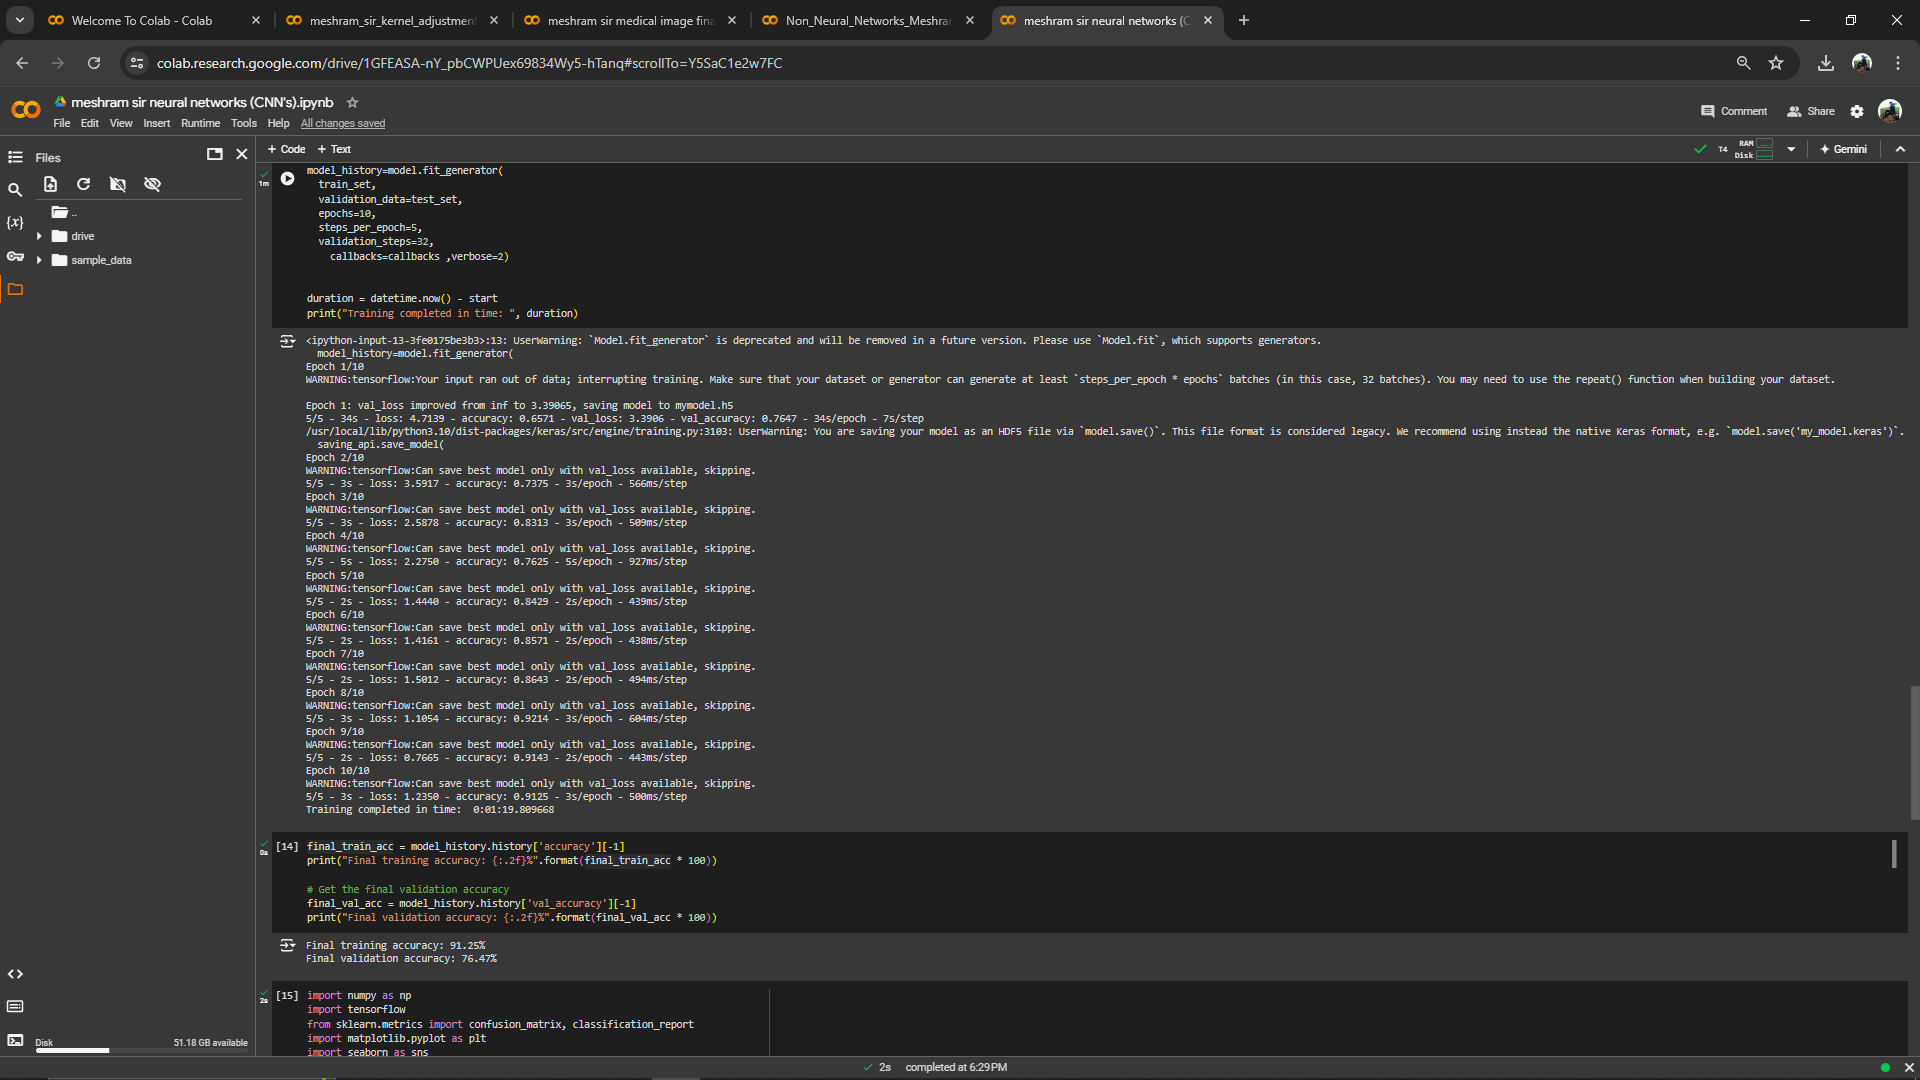

VGGNet 16 With the denoising algorithm and kernel
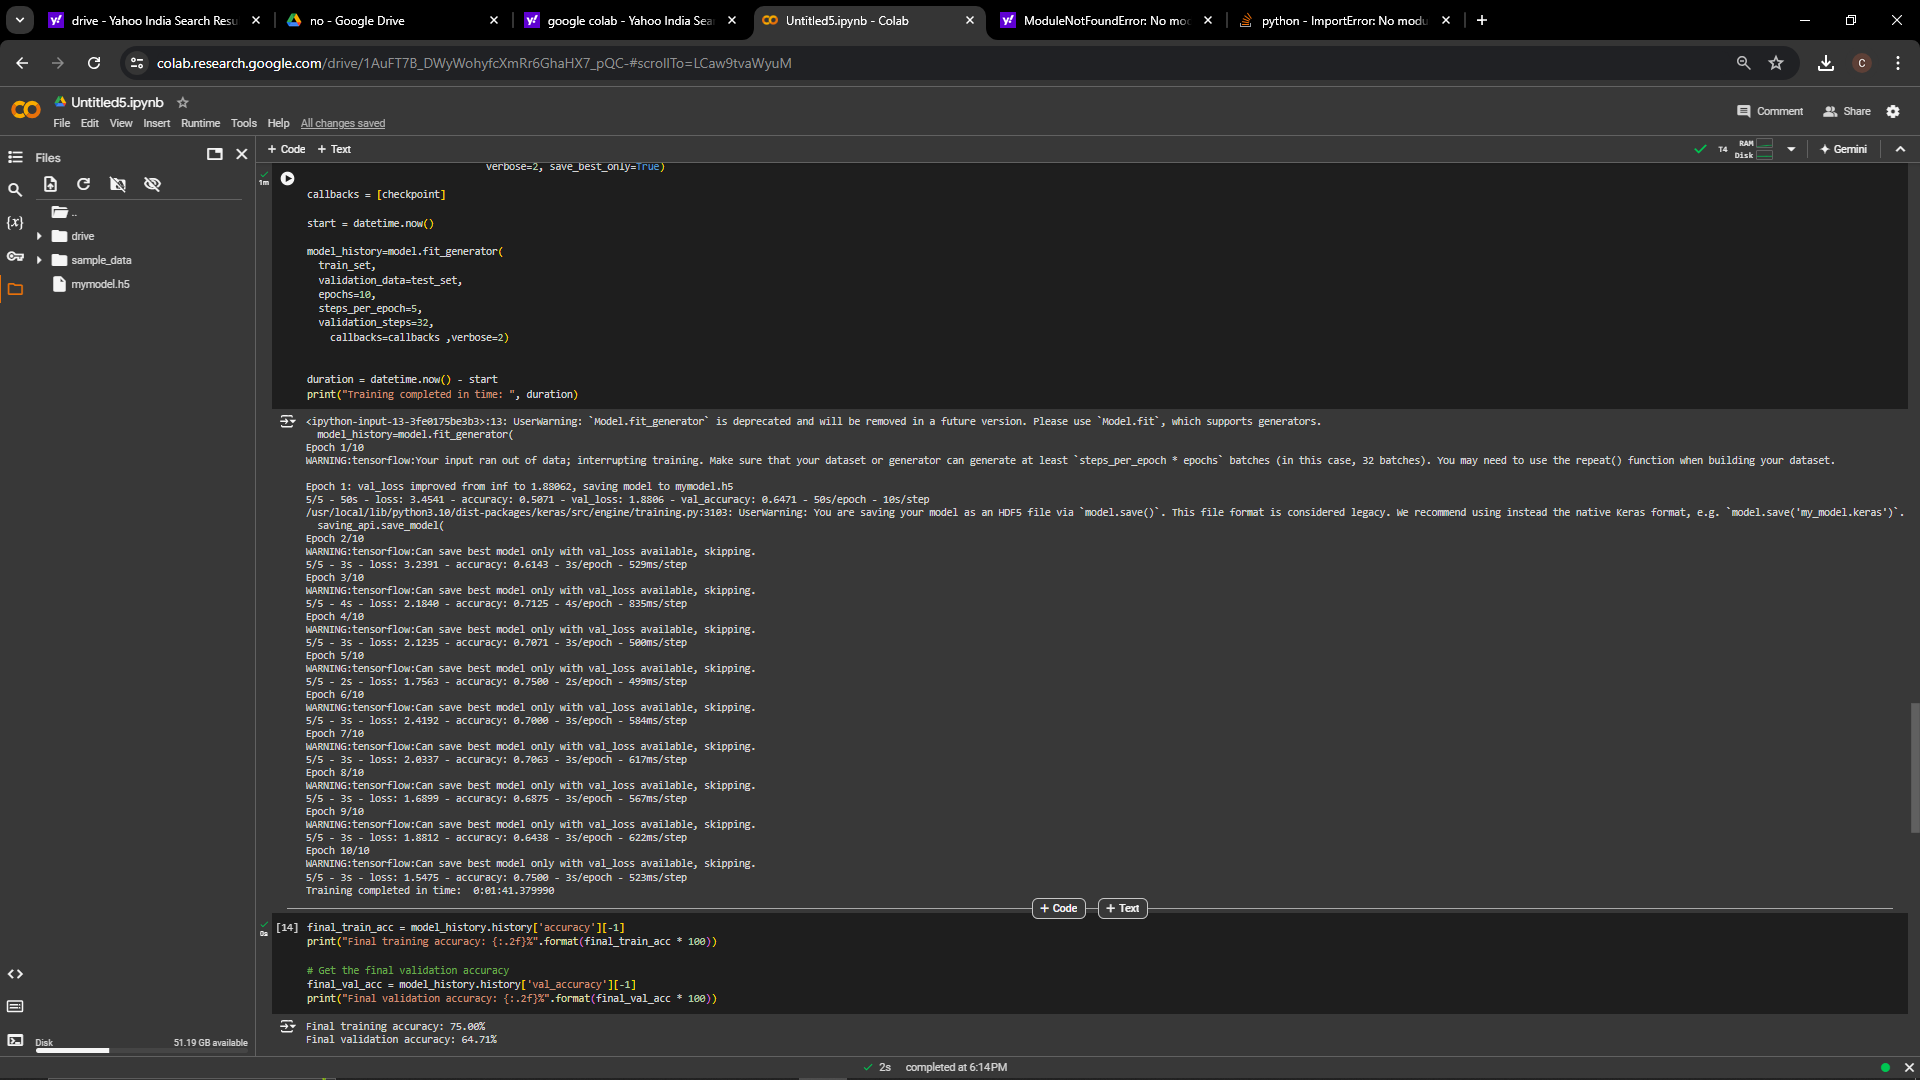

VGGNet 16 With the denoising algorithm and without kernel
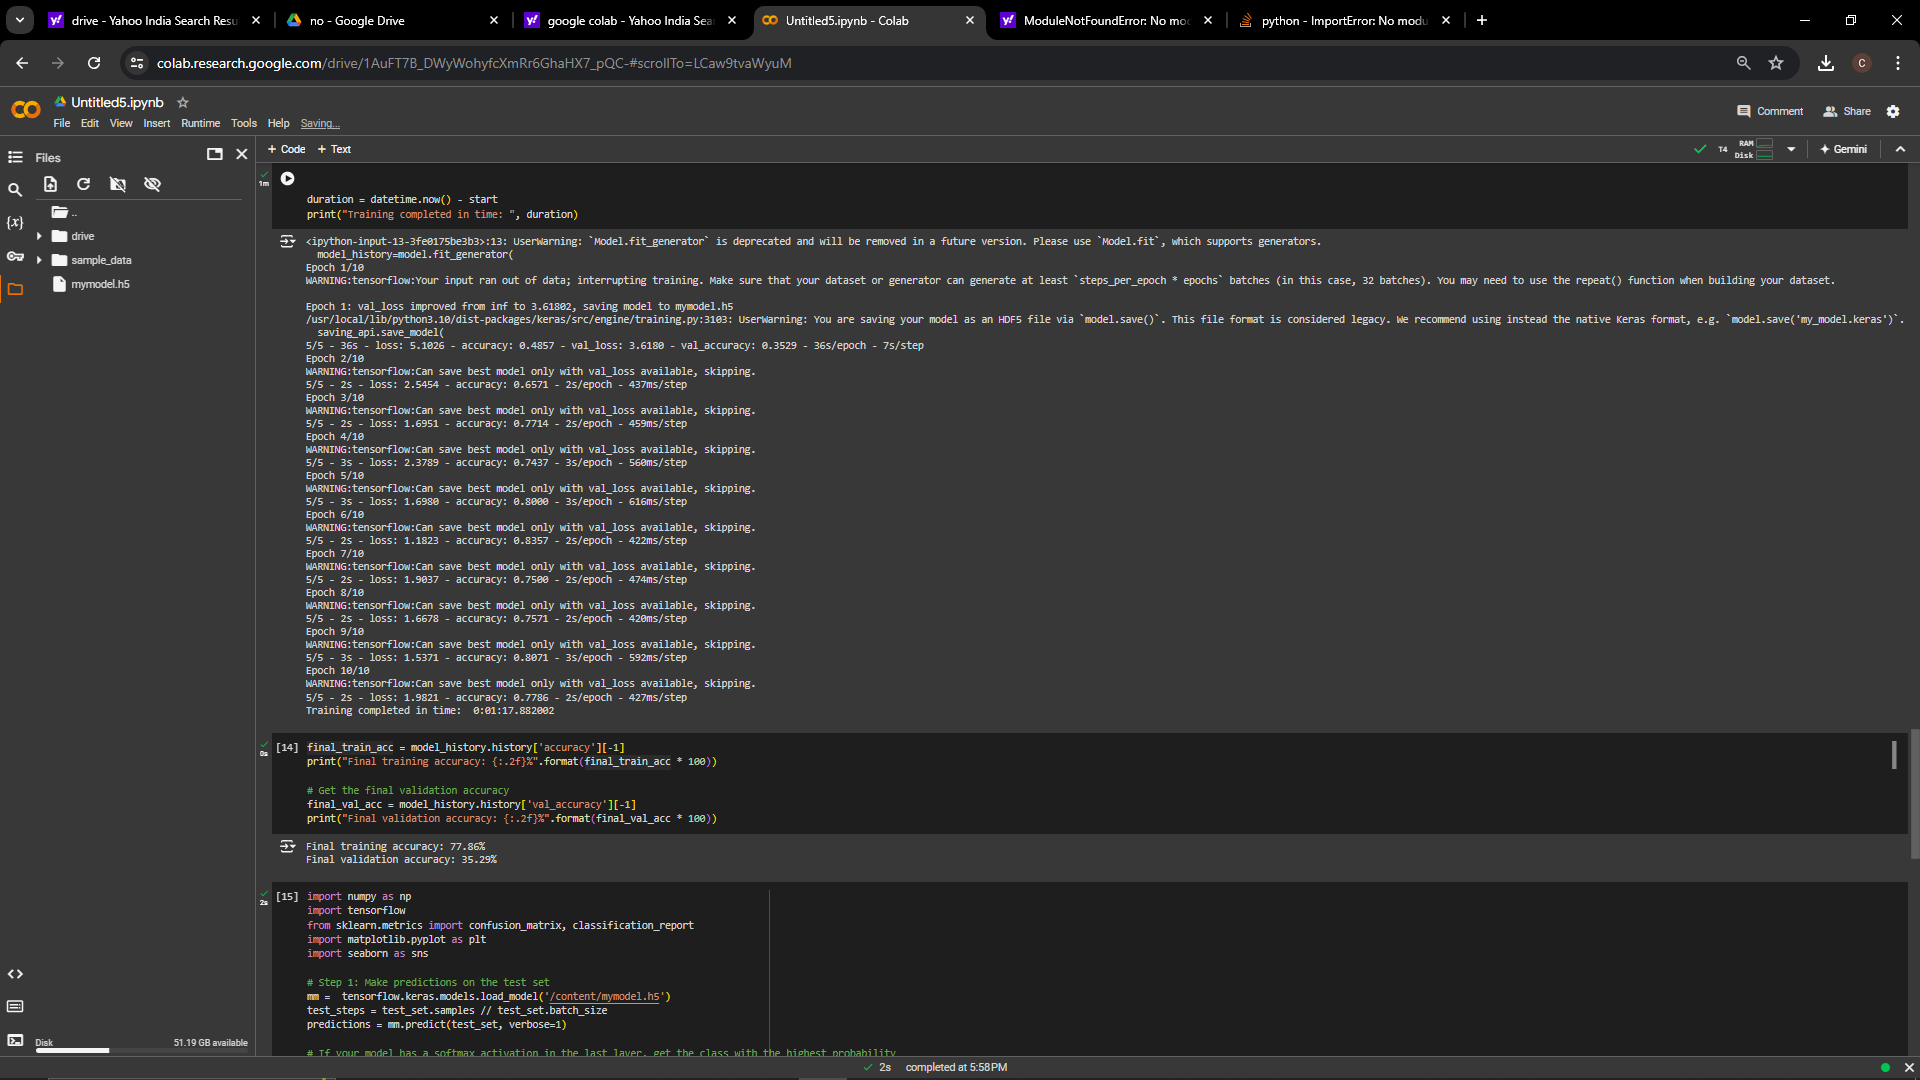




---



ResNet50 Without the denoising algorithm
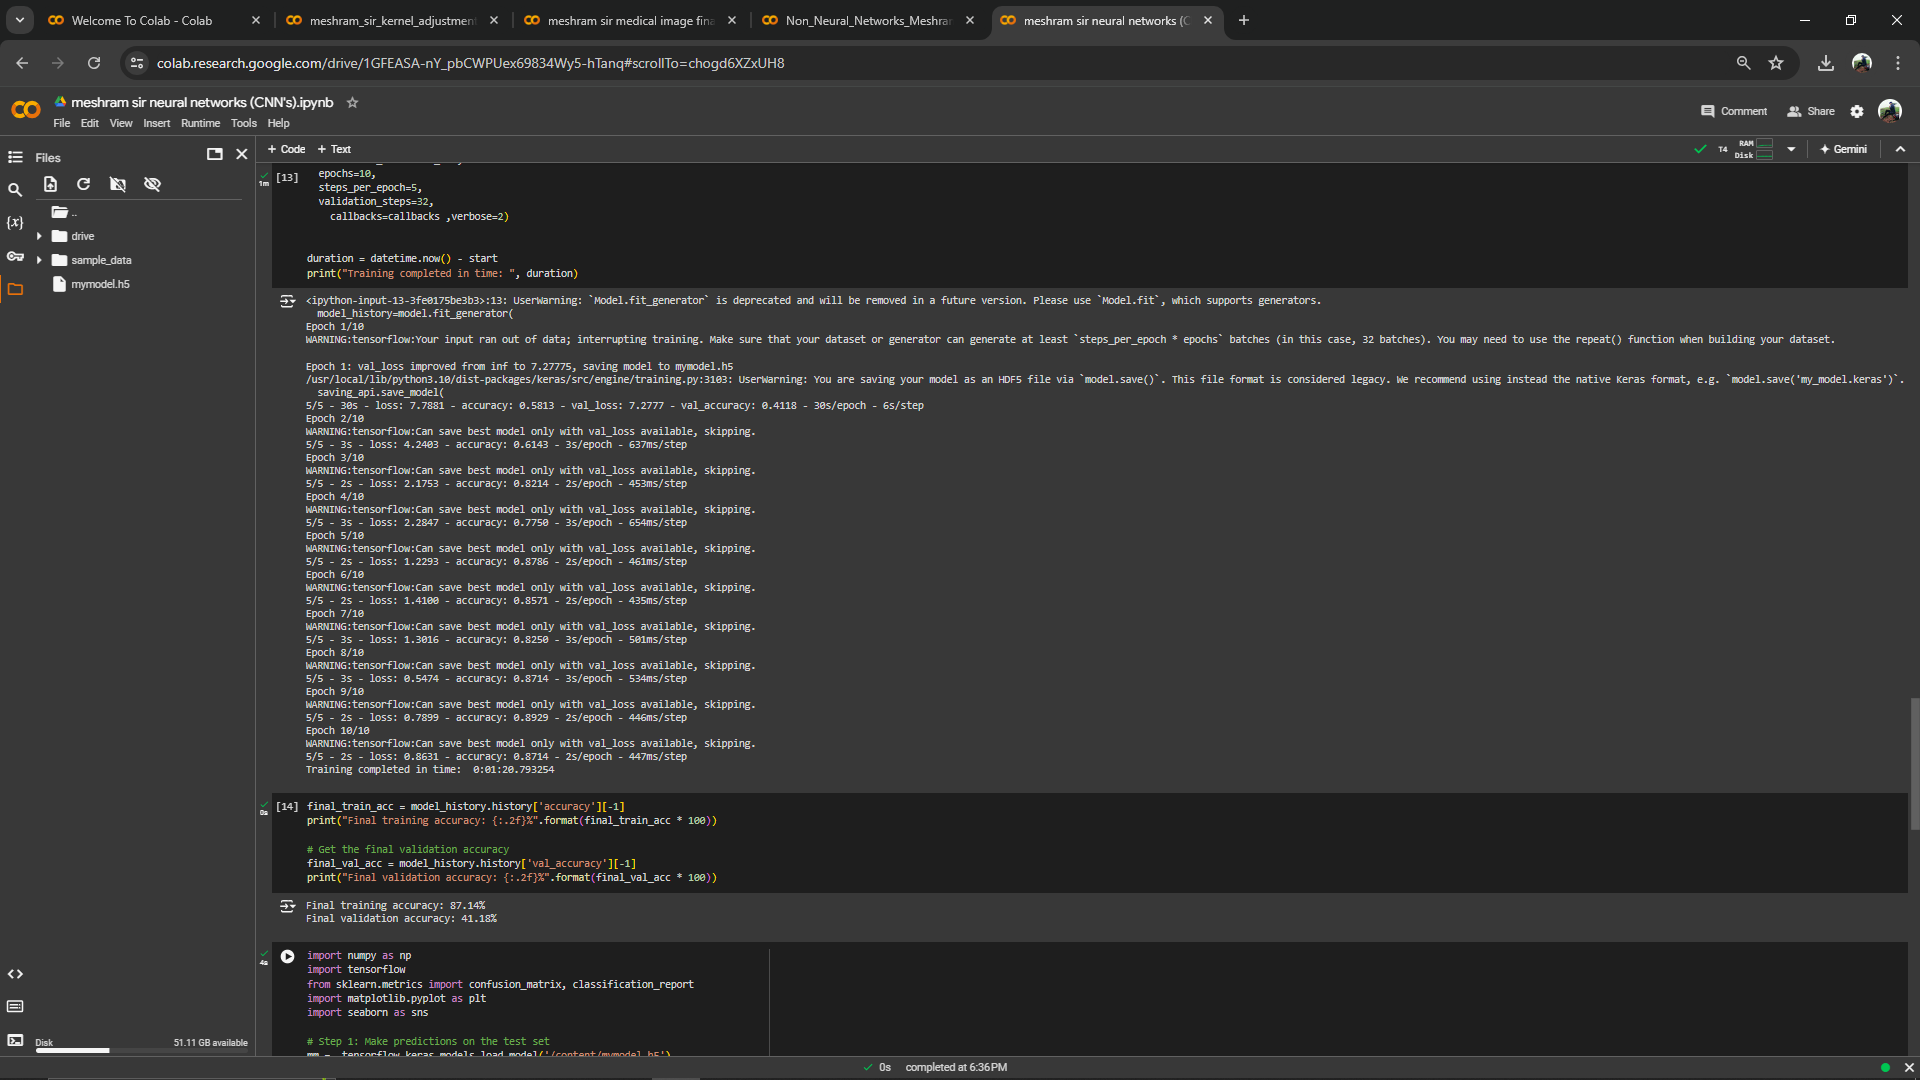

ResNet50 With the denoising algorithm and kernel
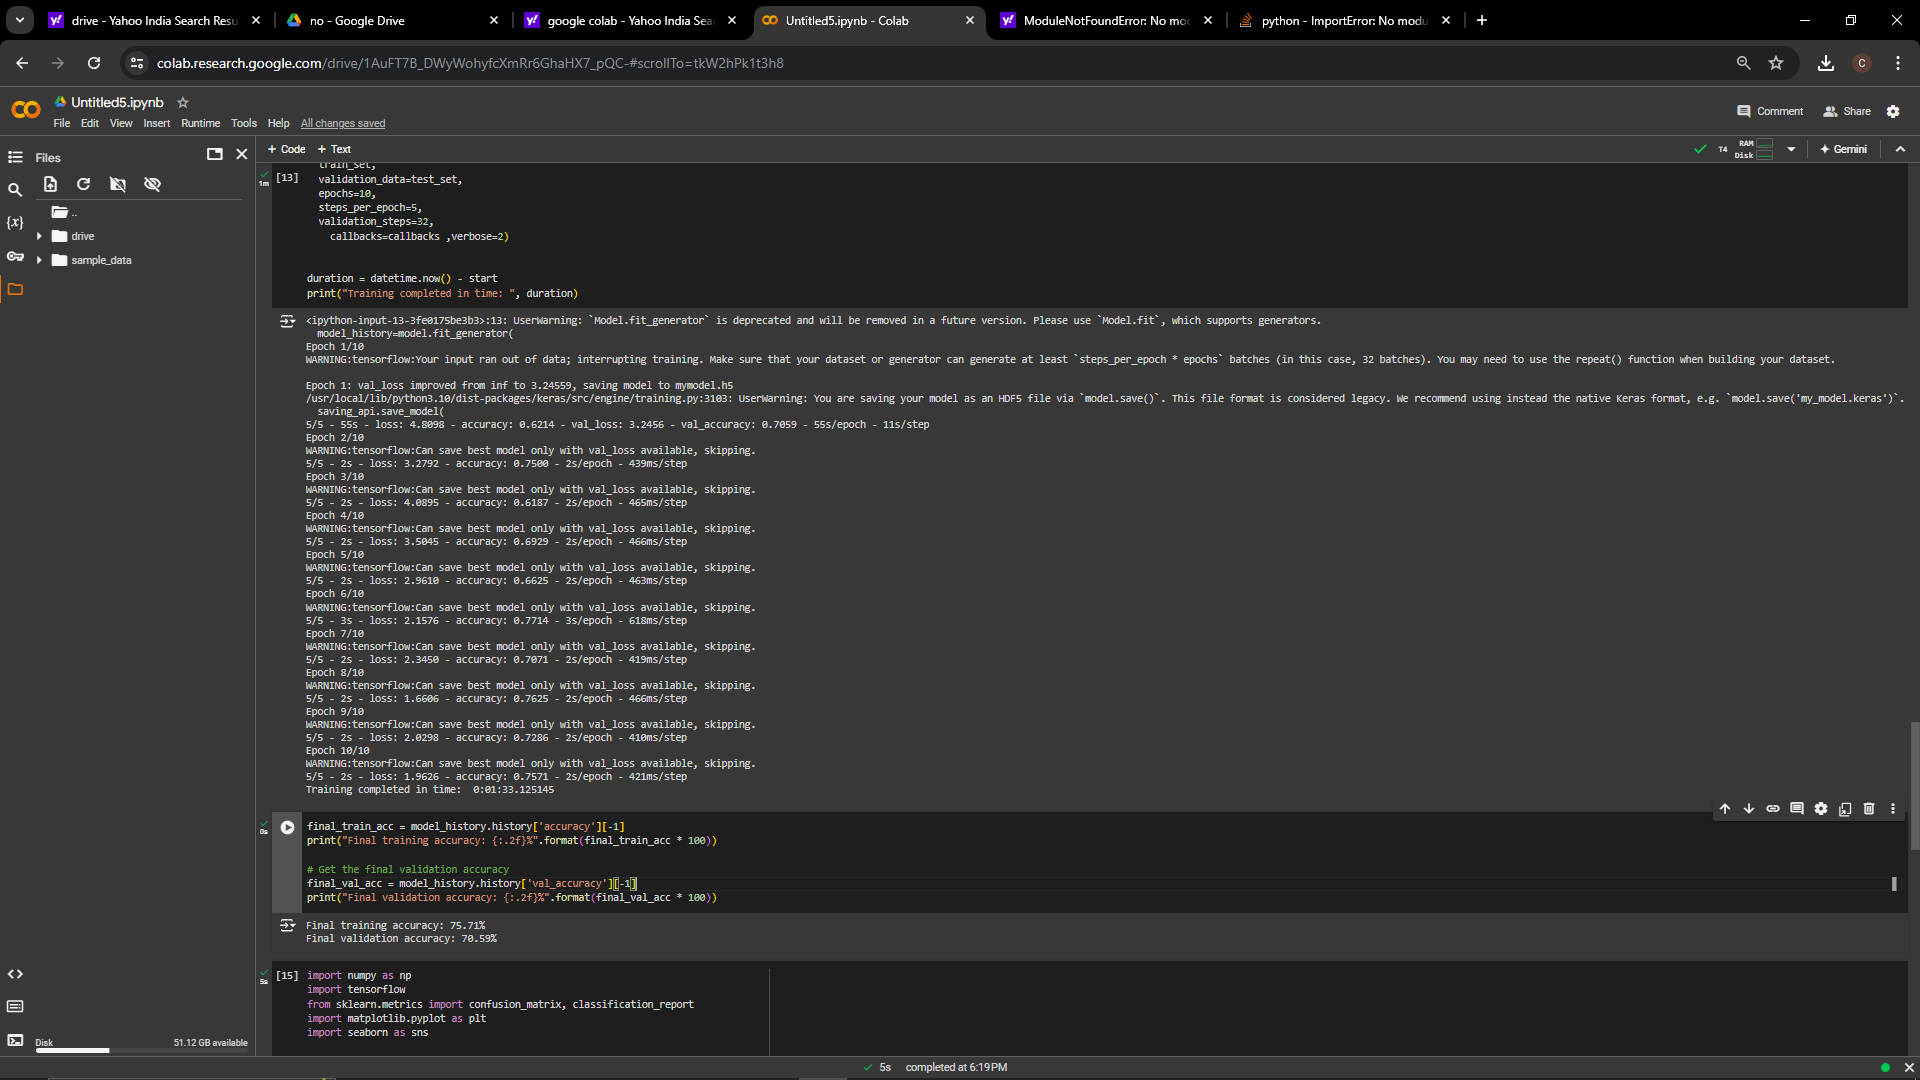

ResNet50 With the denoising algorithm aand without kernel
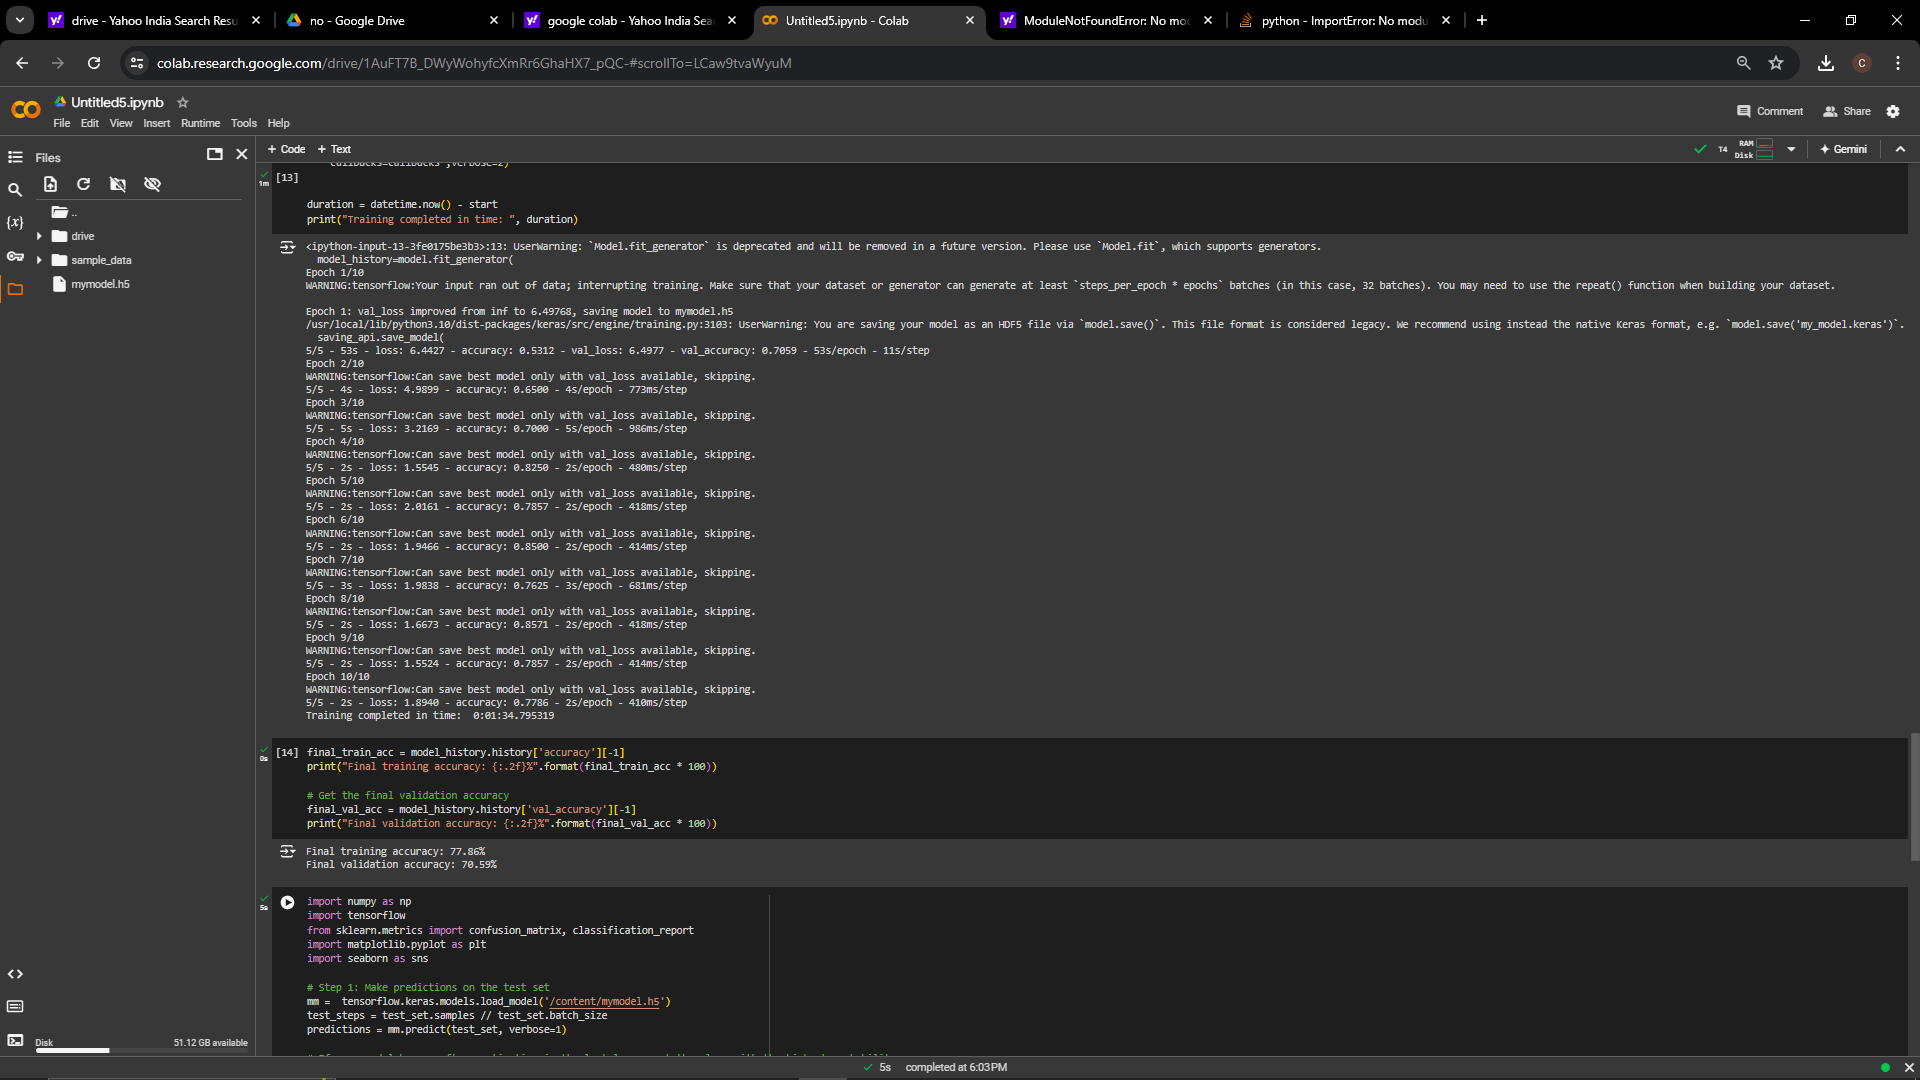



---



MobileNet Without the denoising algorithm
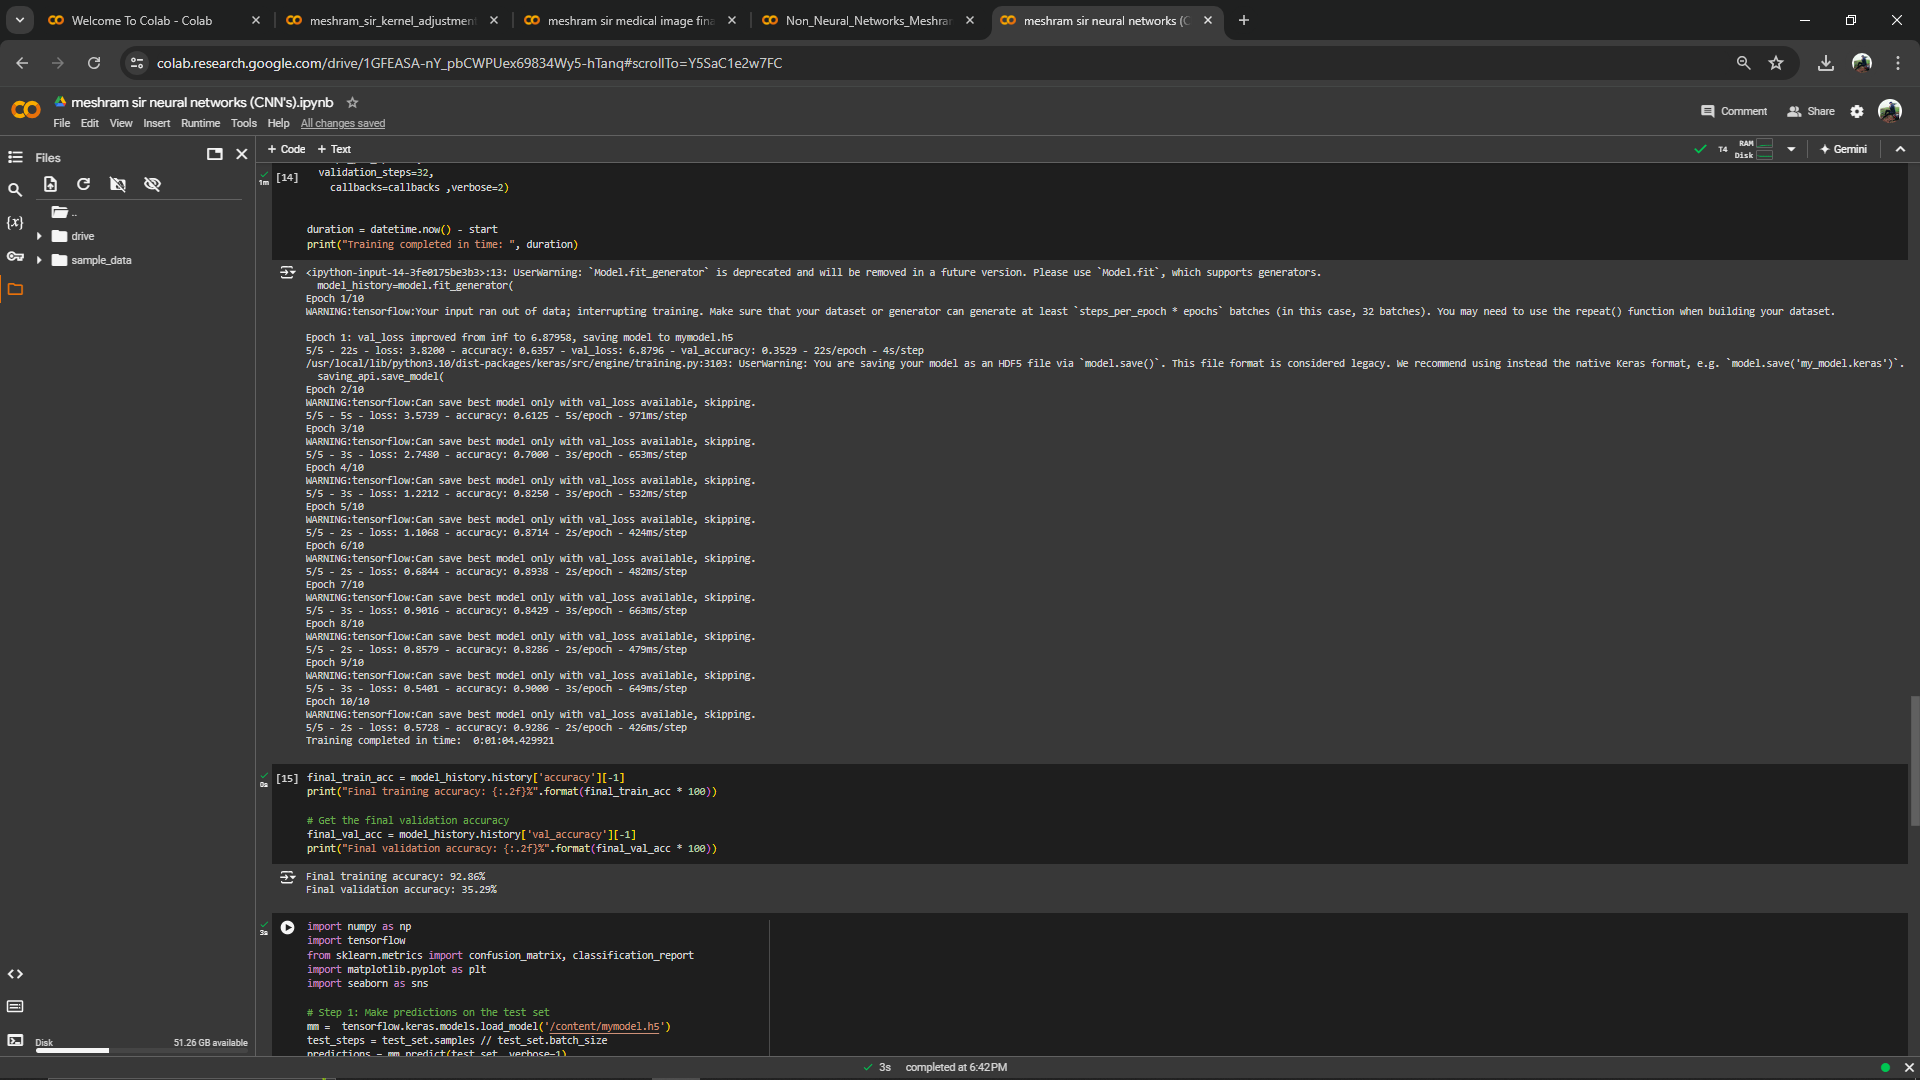

MobileNet With the denoising algorithm and kernel
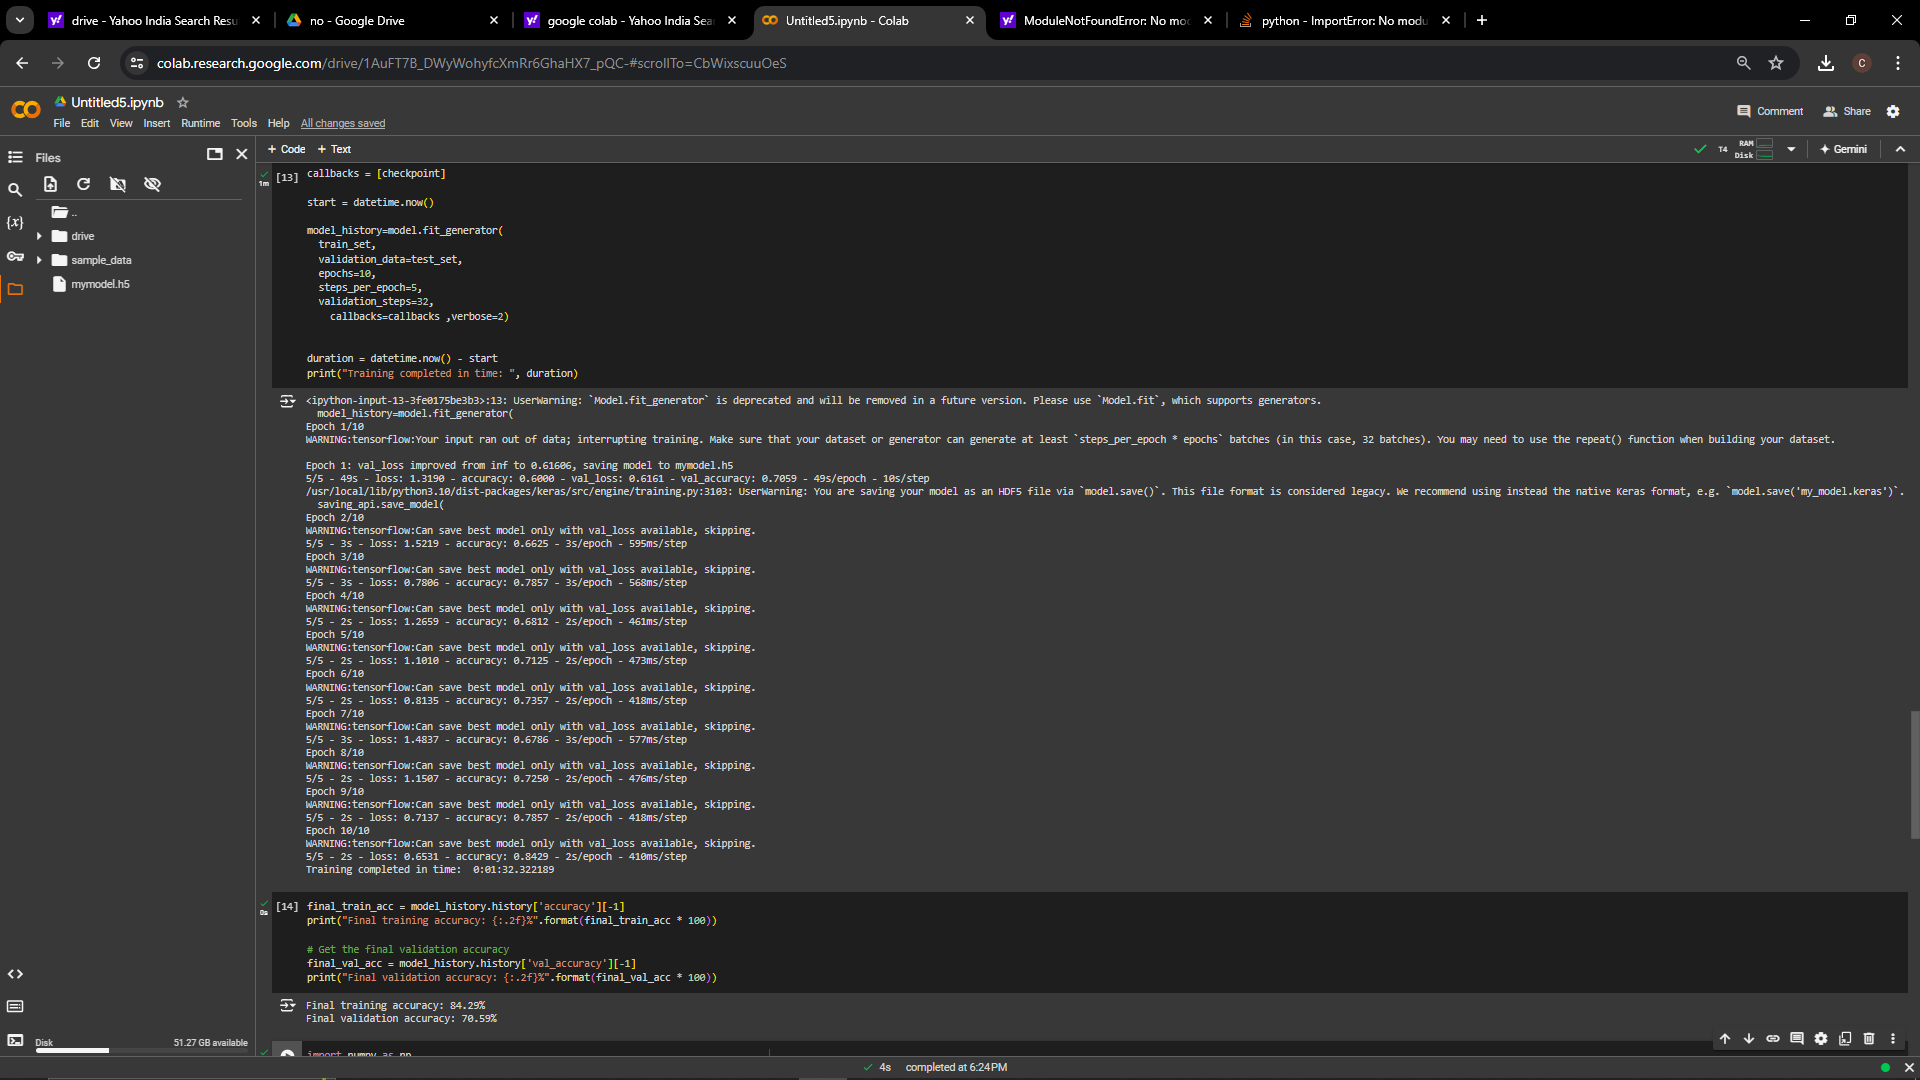

MobileNet With the denoising algorithm and without kernel
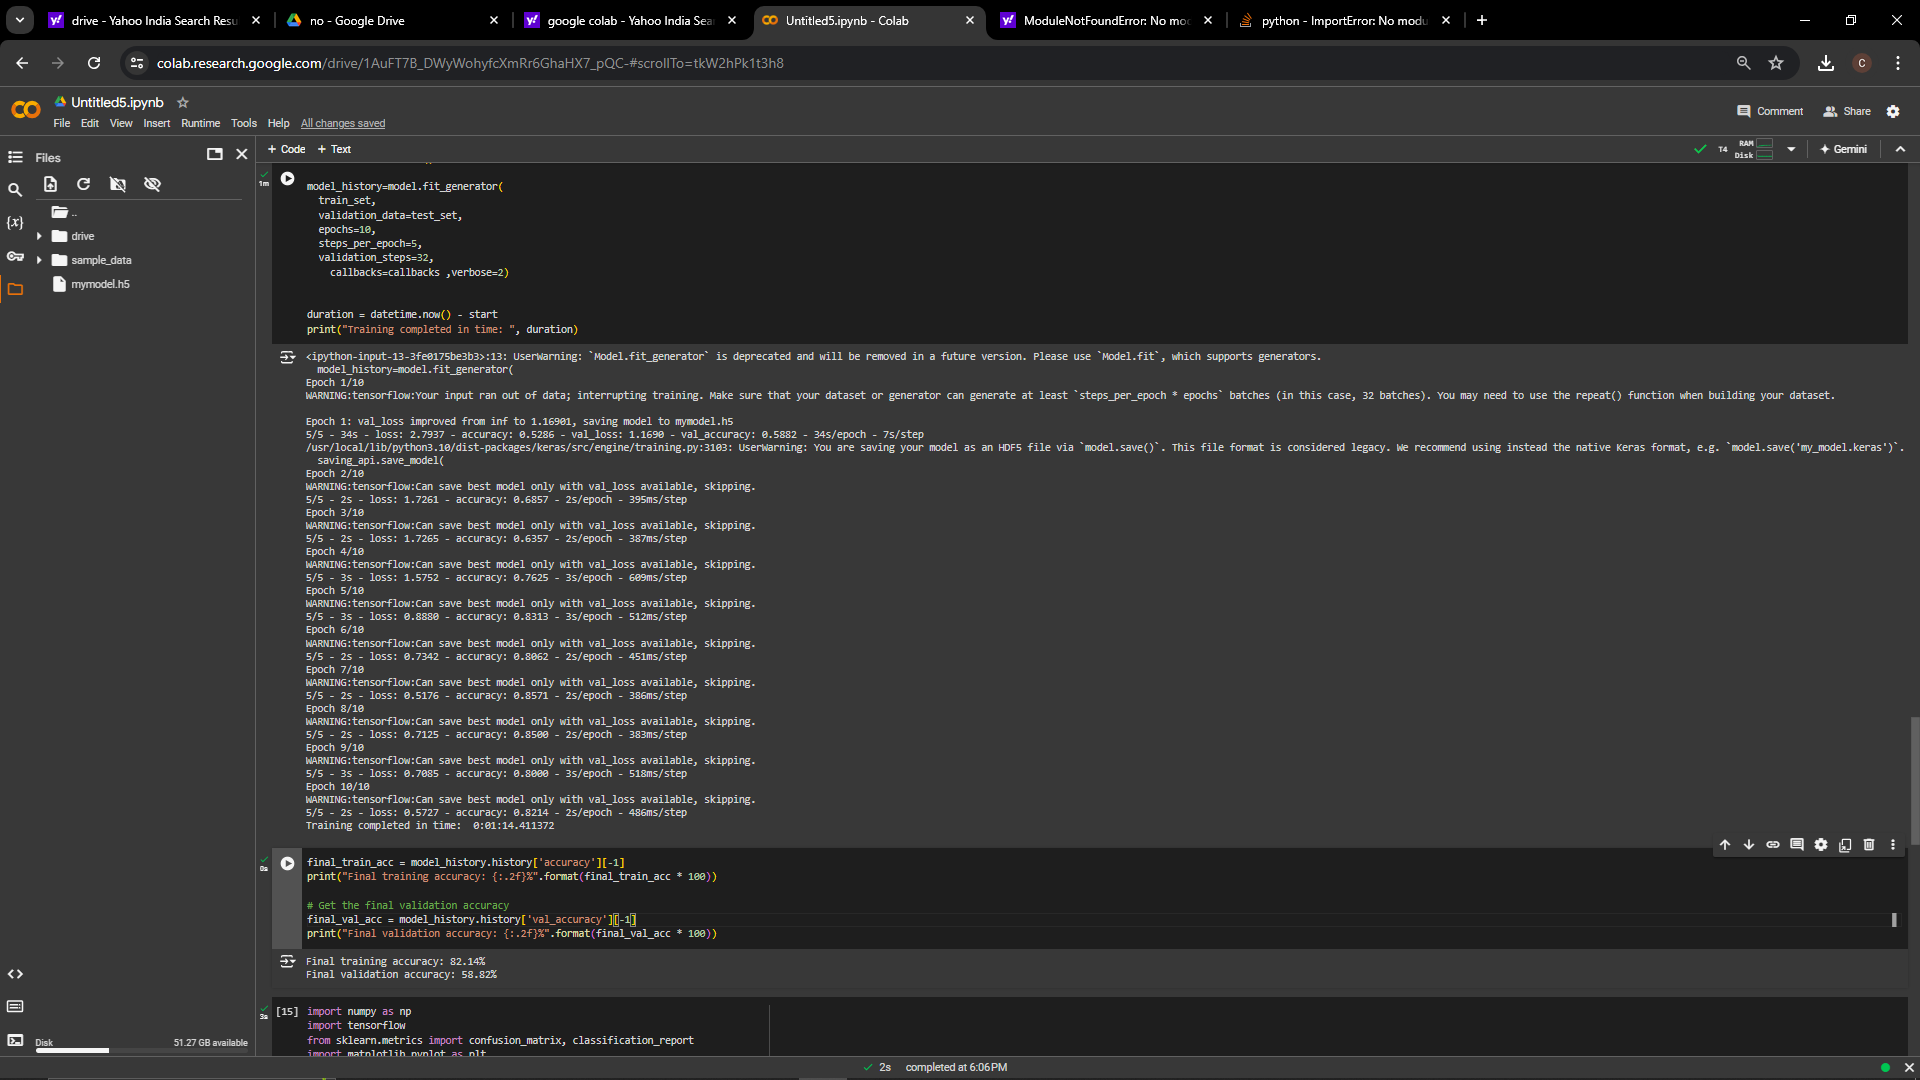

# **The below cells contains photos of the output of code for machine learning algorithm training**

Logistic Regression Without the denoising algorithm
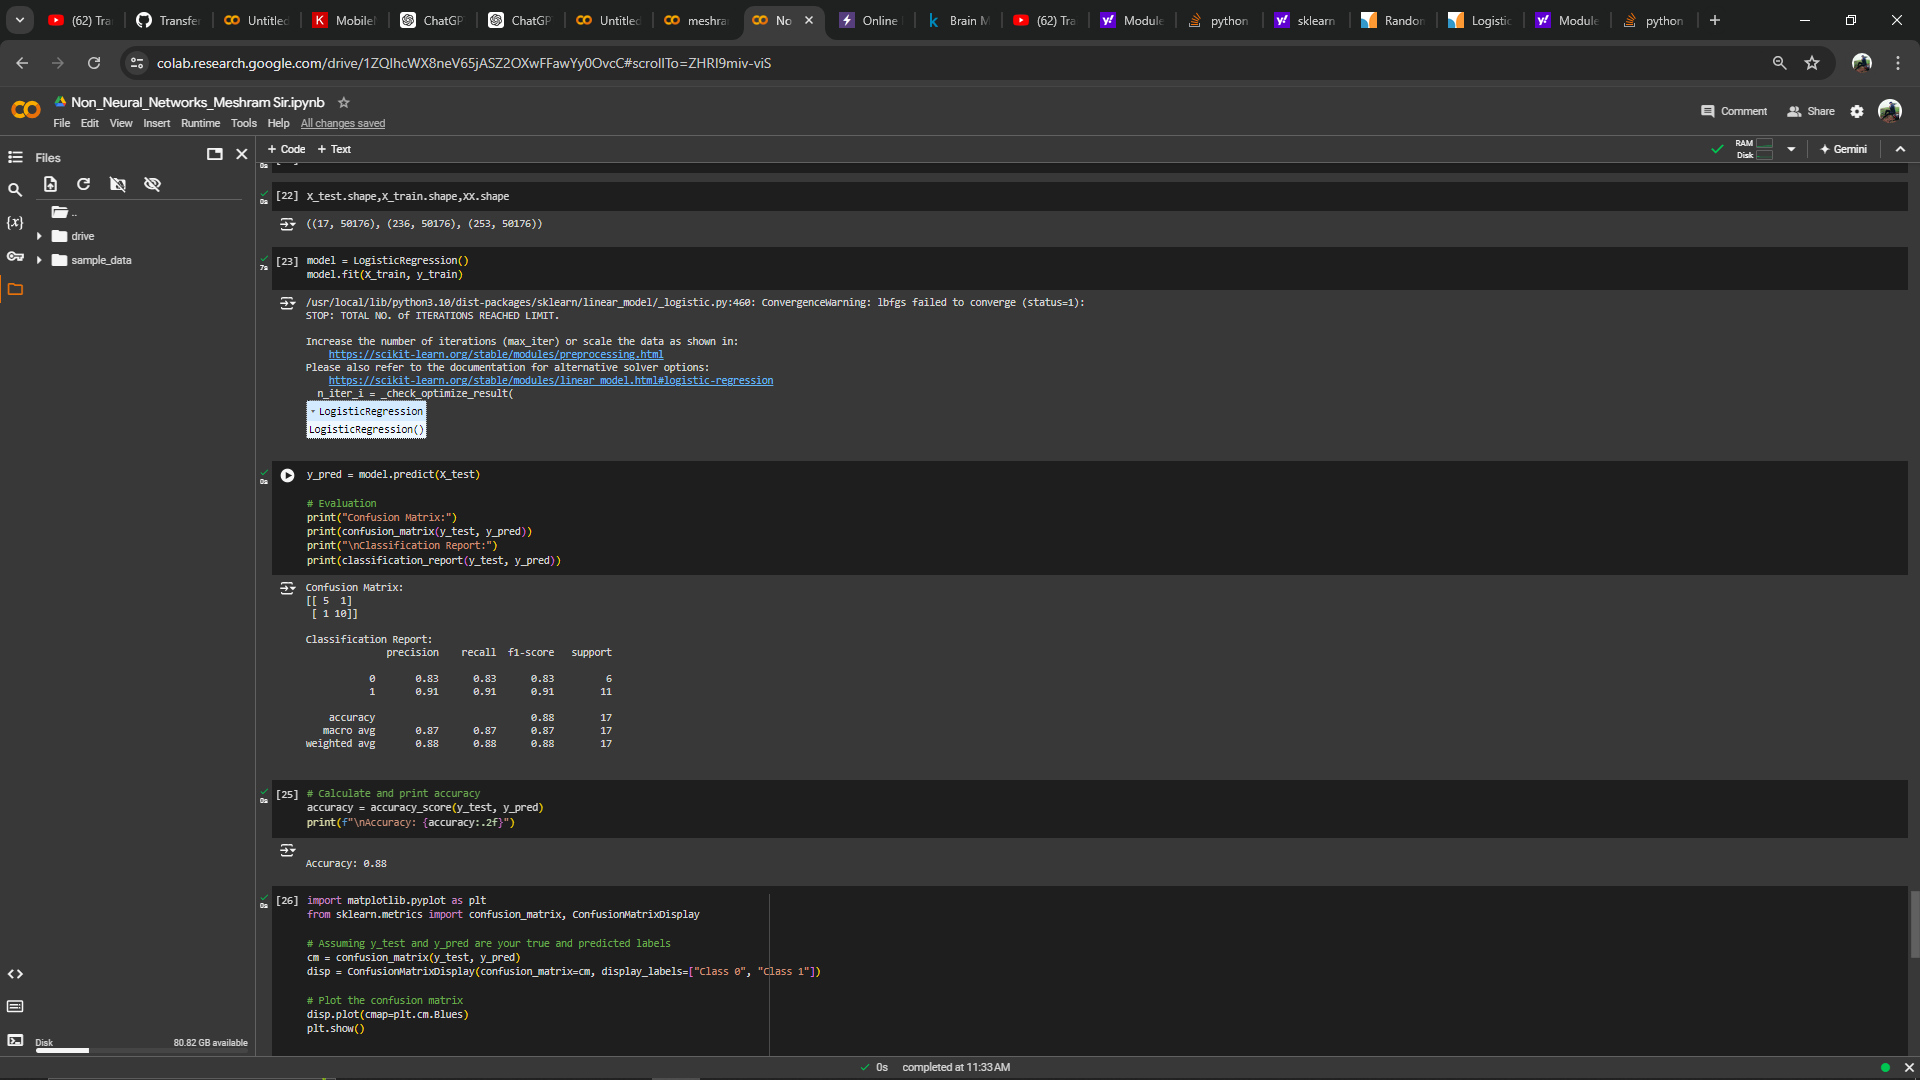

Logistic Regression With the denoising algorithm and kernel
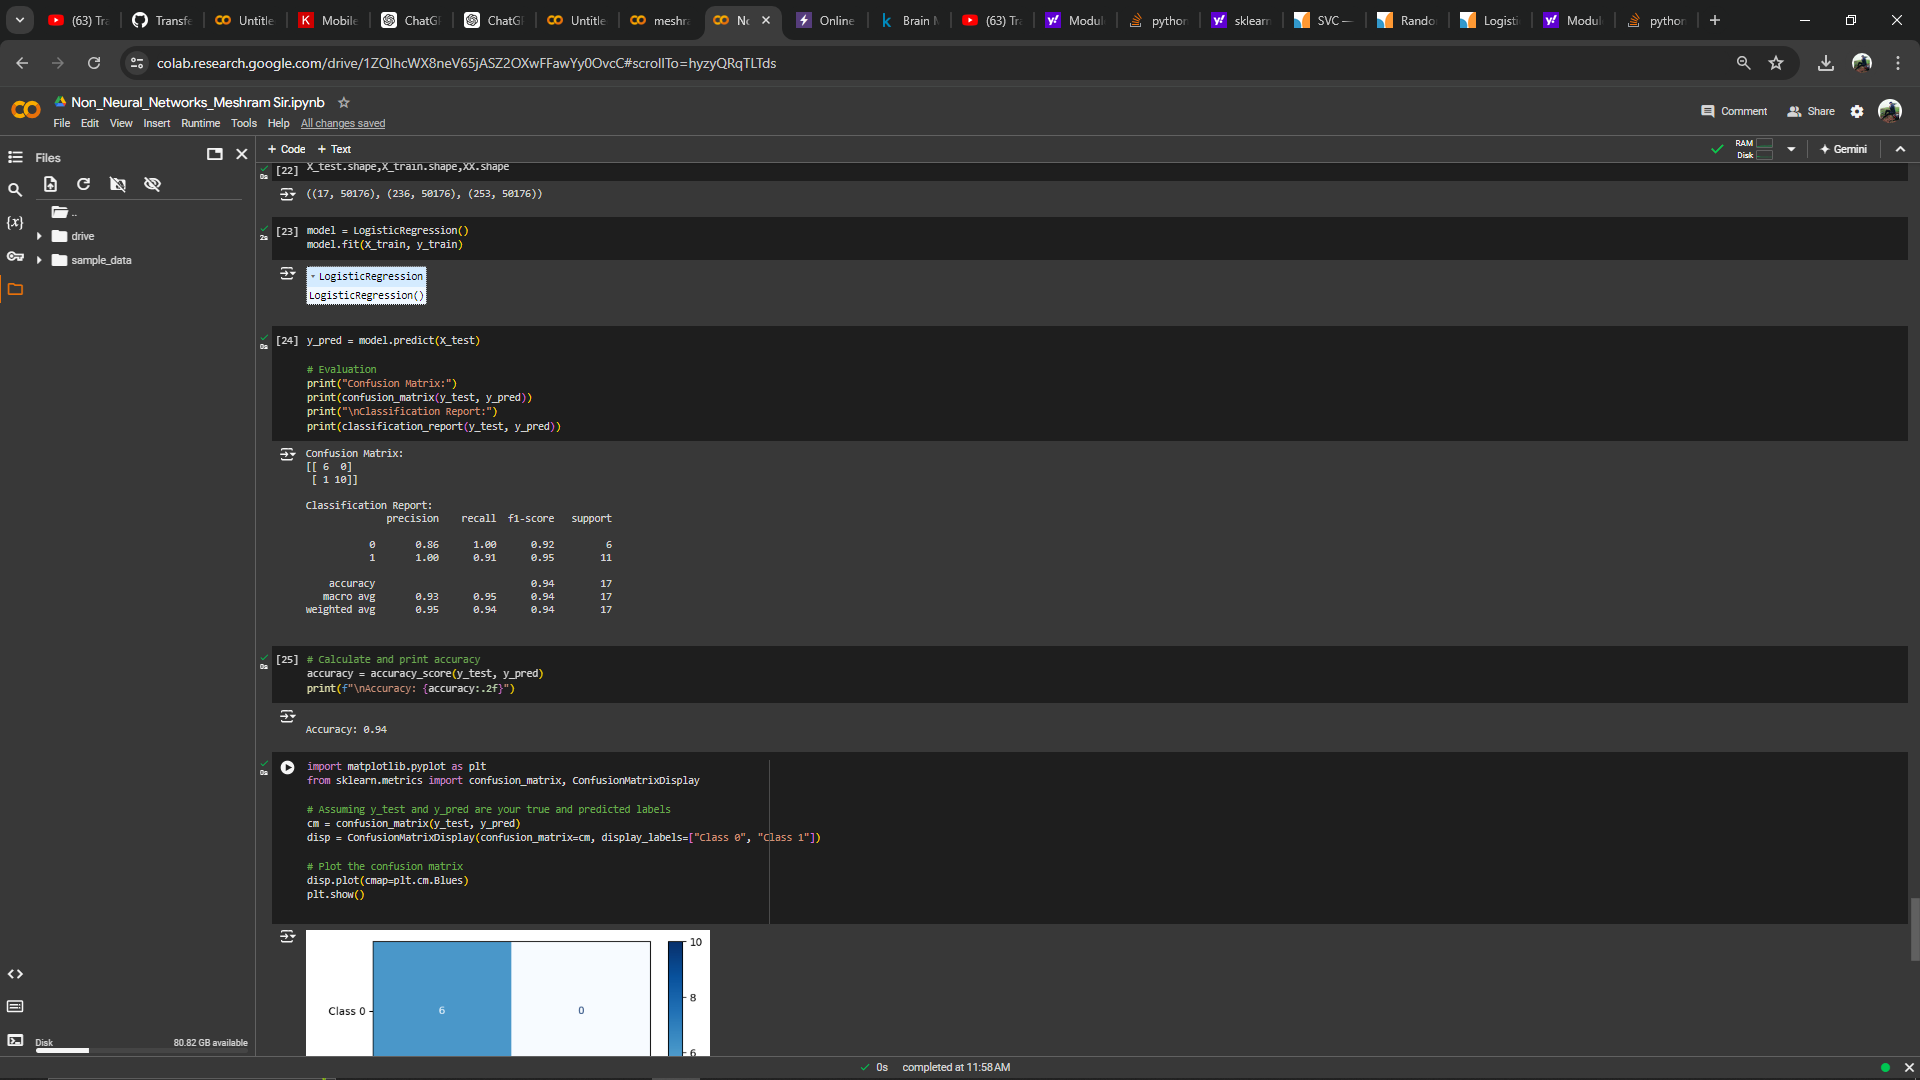

Logistic Regression With the denoising algorithm and without kernel
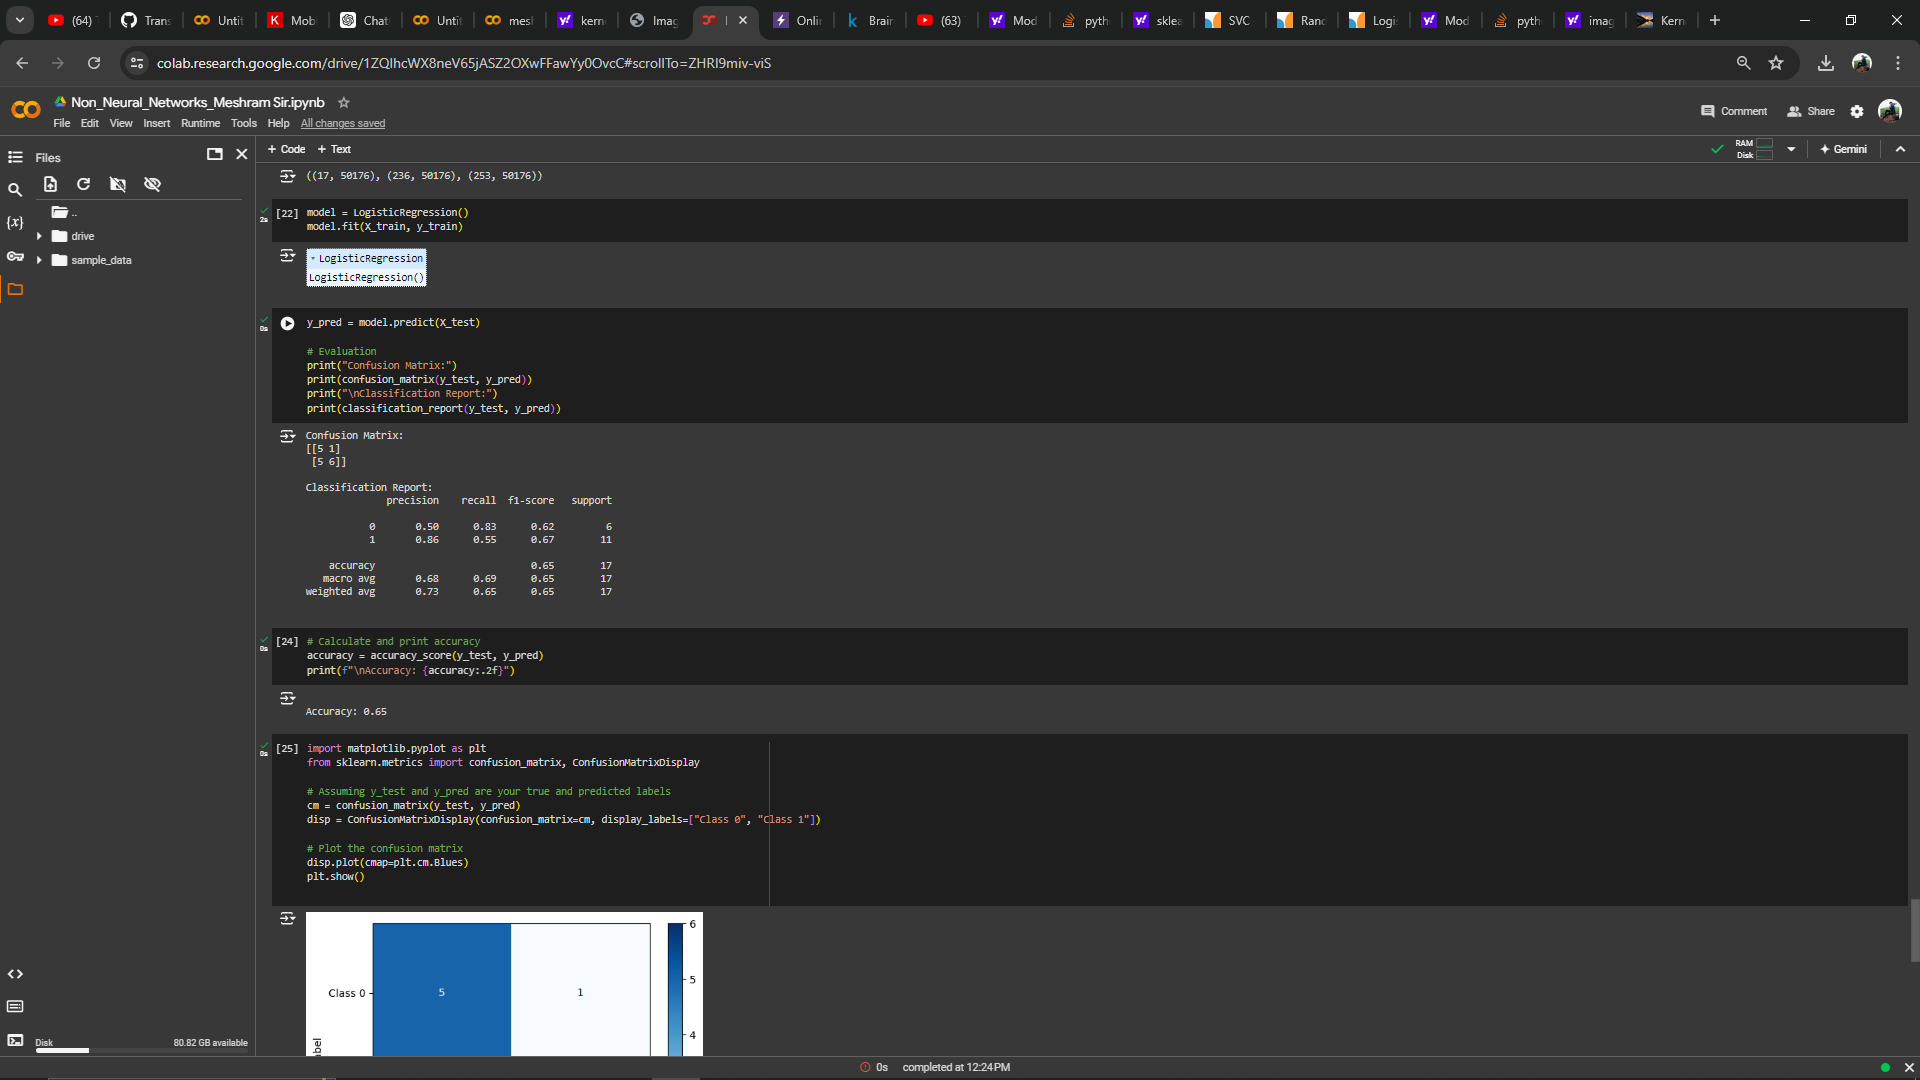



---



Random Forest Classifier Without the denoising algorithm
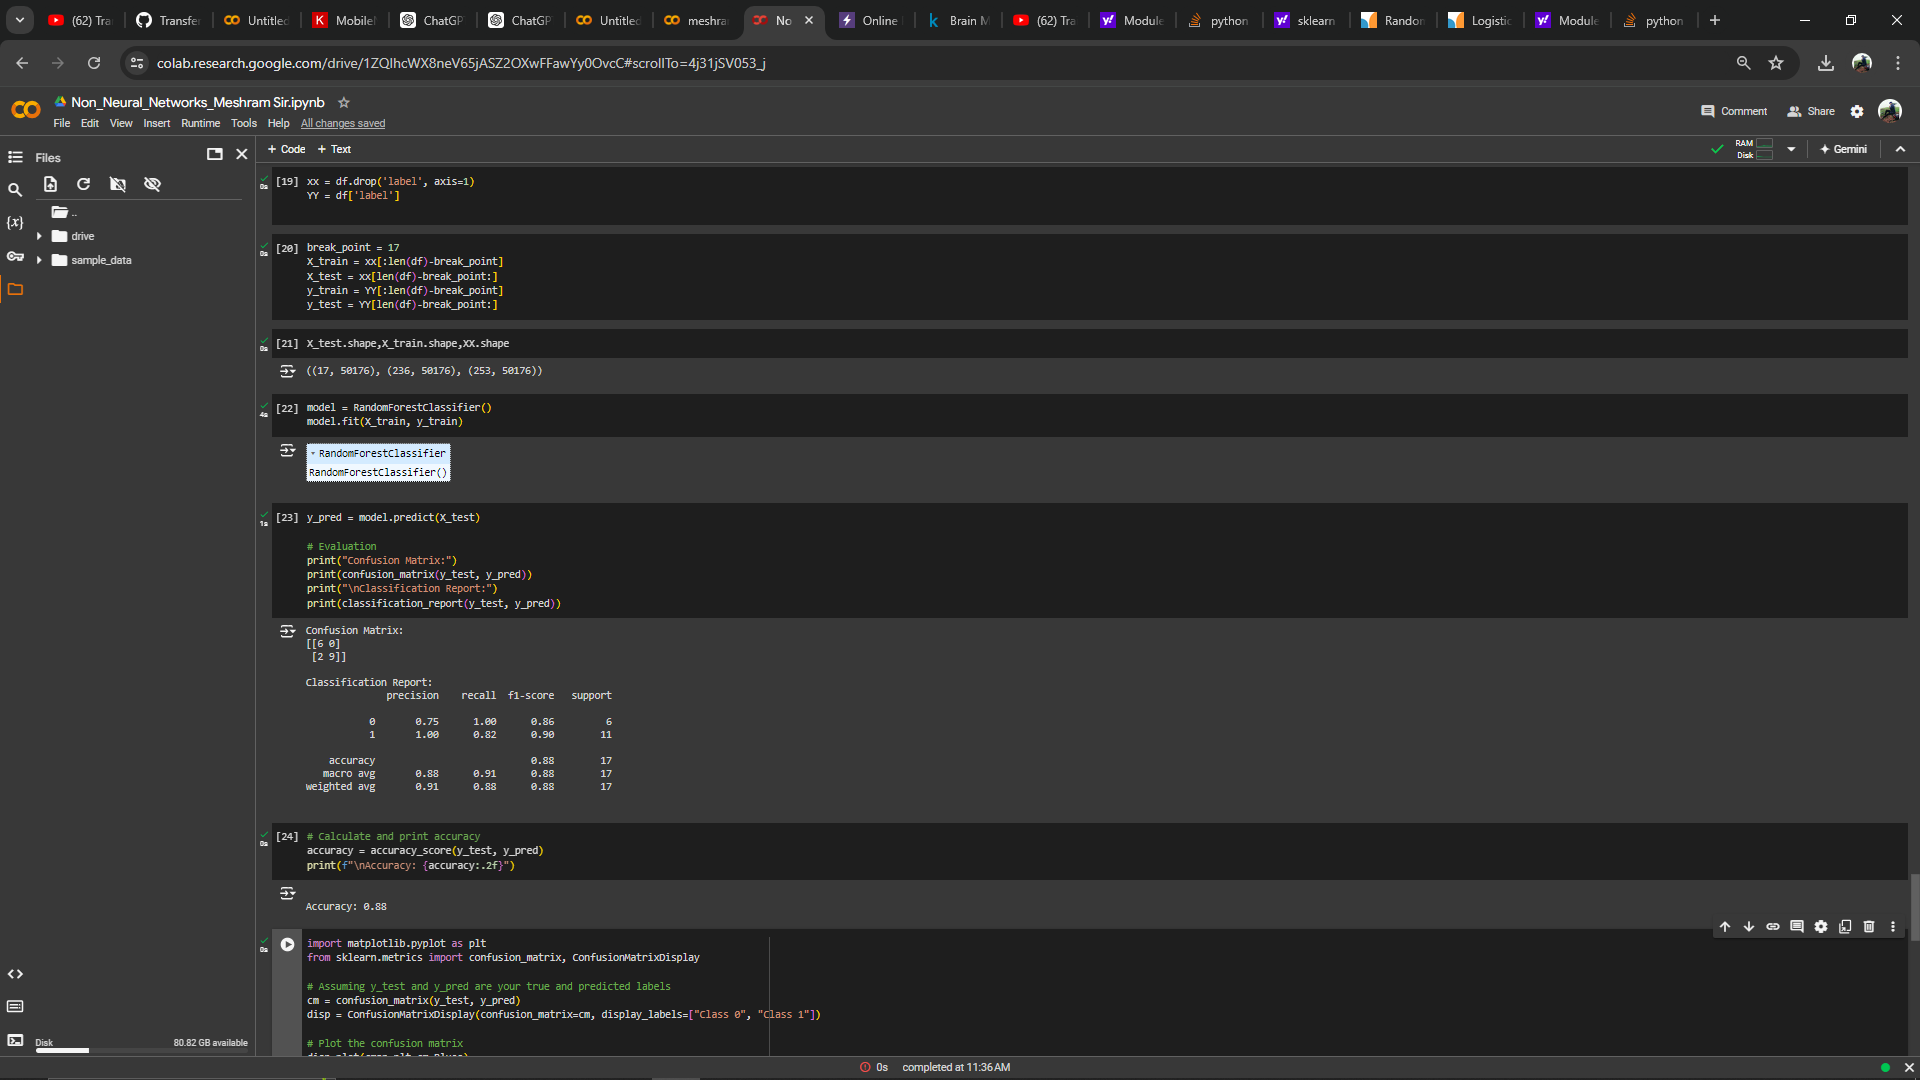

Random Forest Classifier With the denoising algorithm and kernel
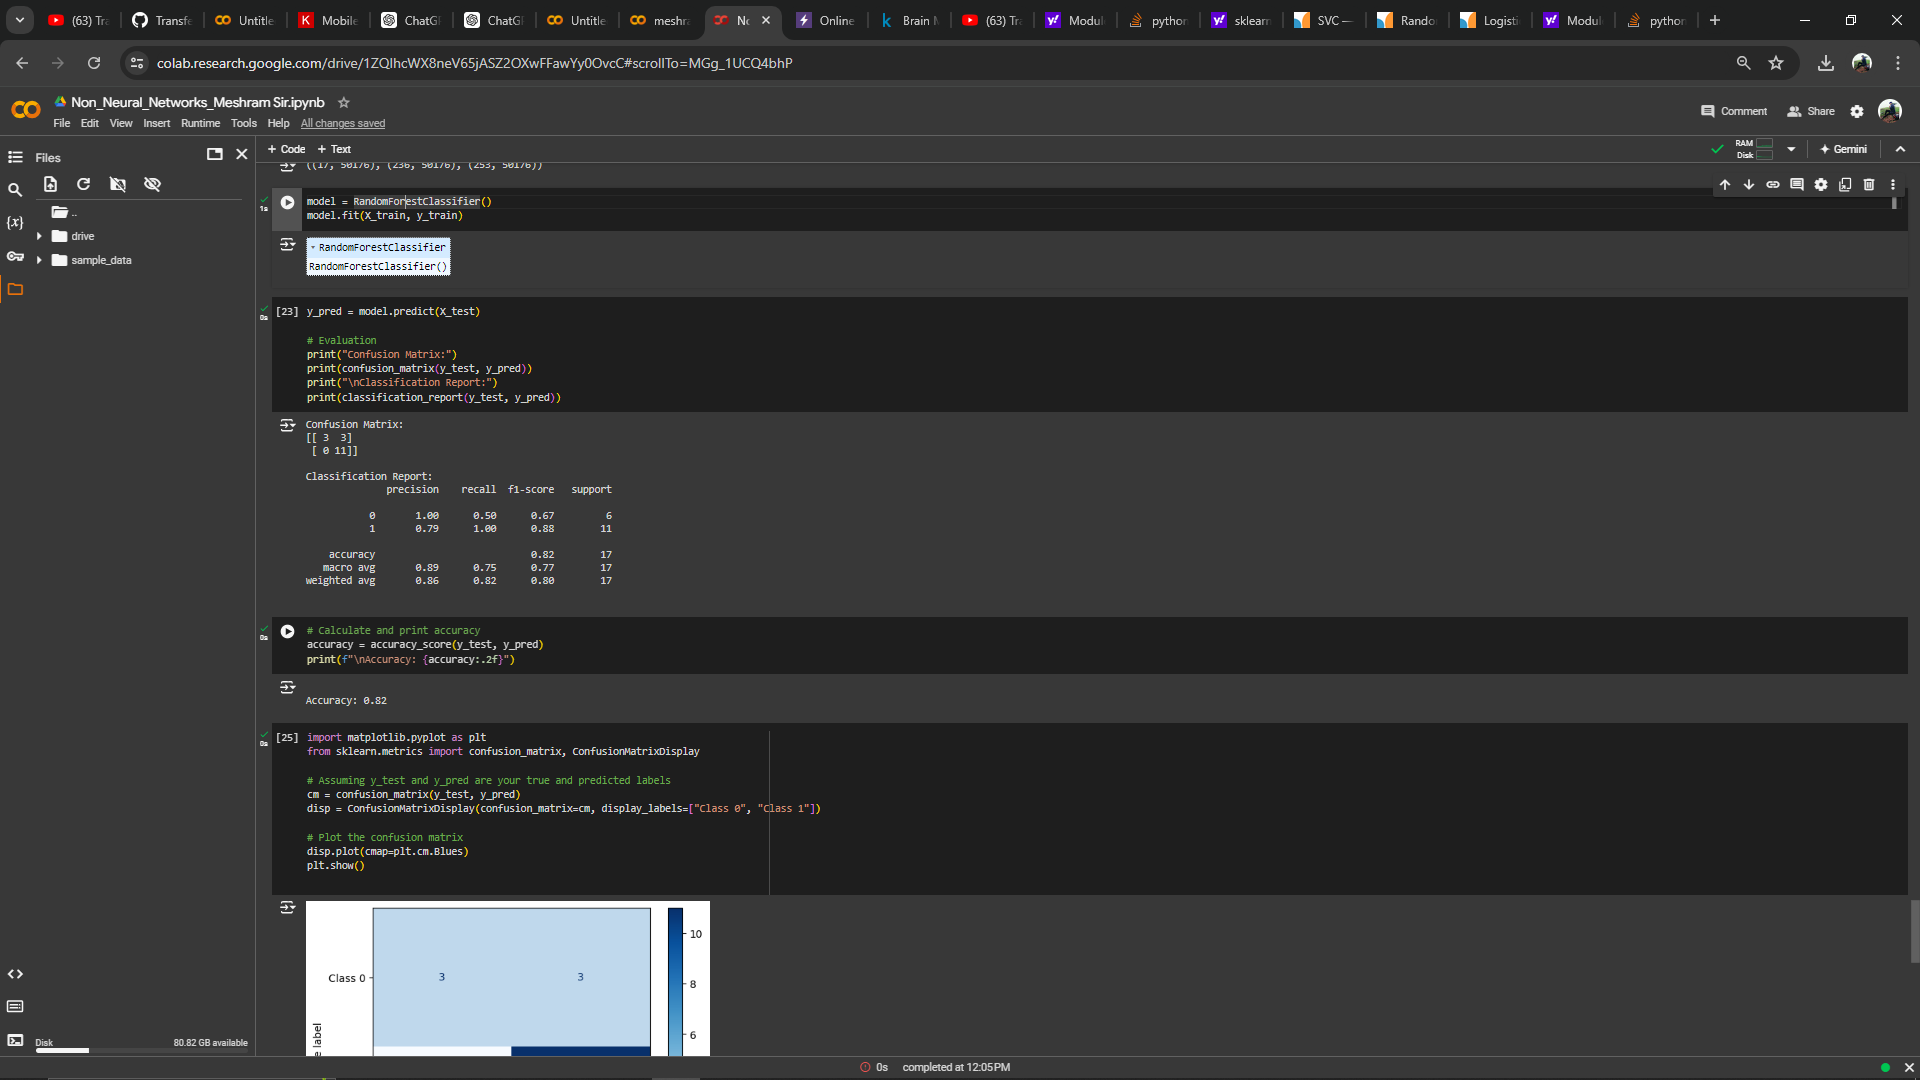

Random Forest Classifier With the denoising algorithm and without kernel
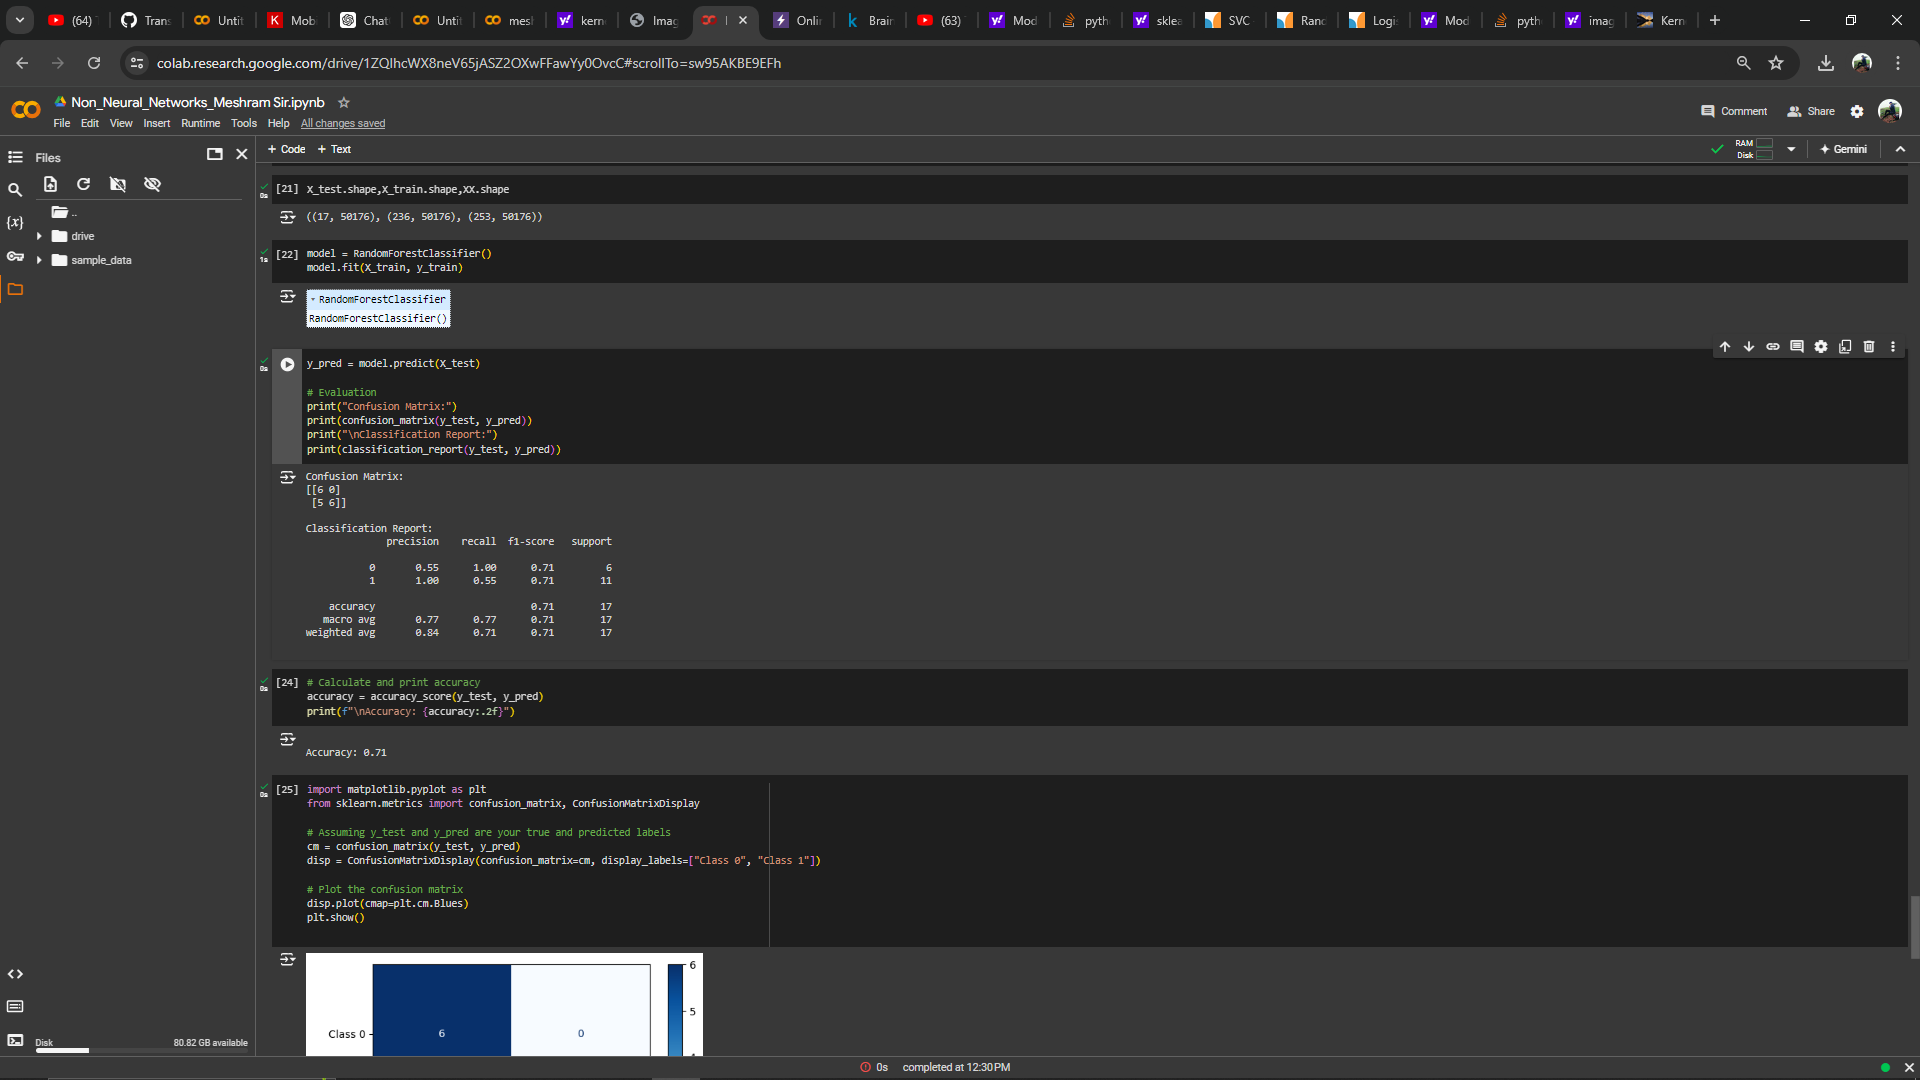



---



Support Vector Machine Classifier Without the denoising algorithm
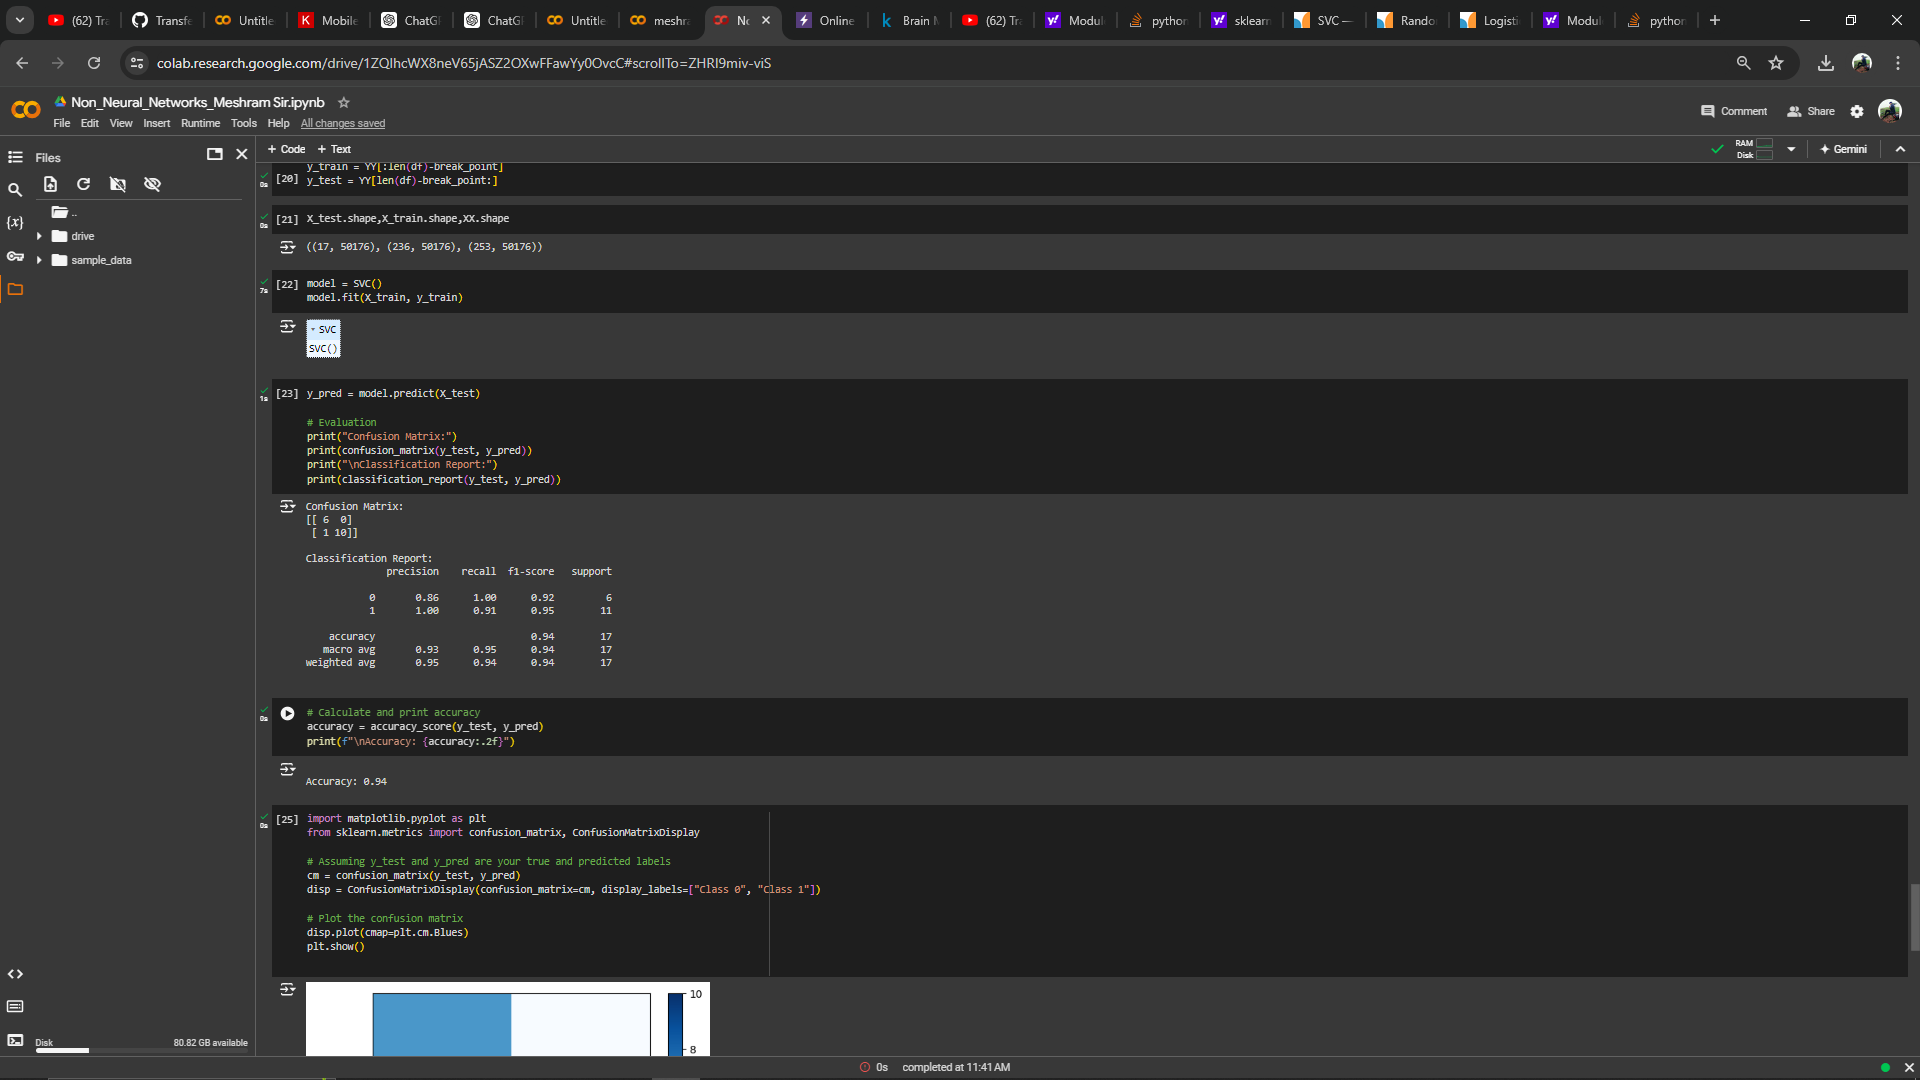

Support Vector Machine Classifier Without the denoising algorithm and kernel
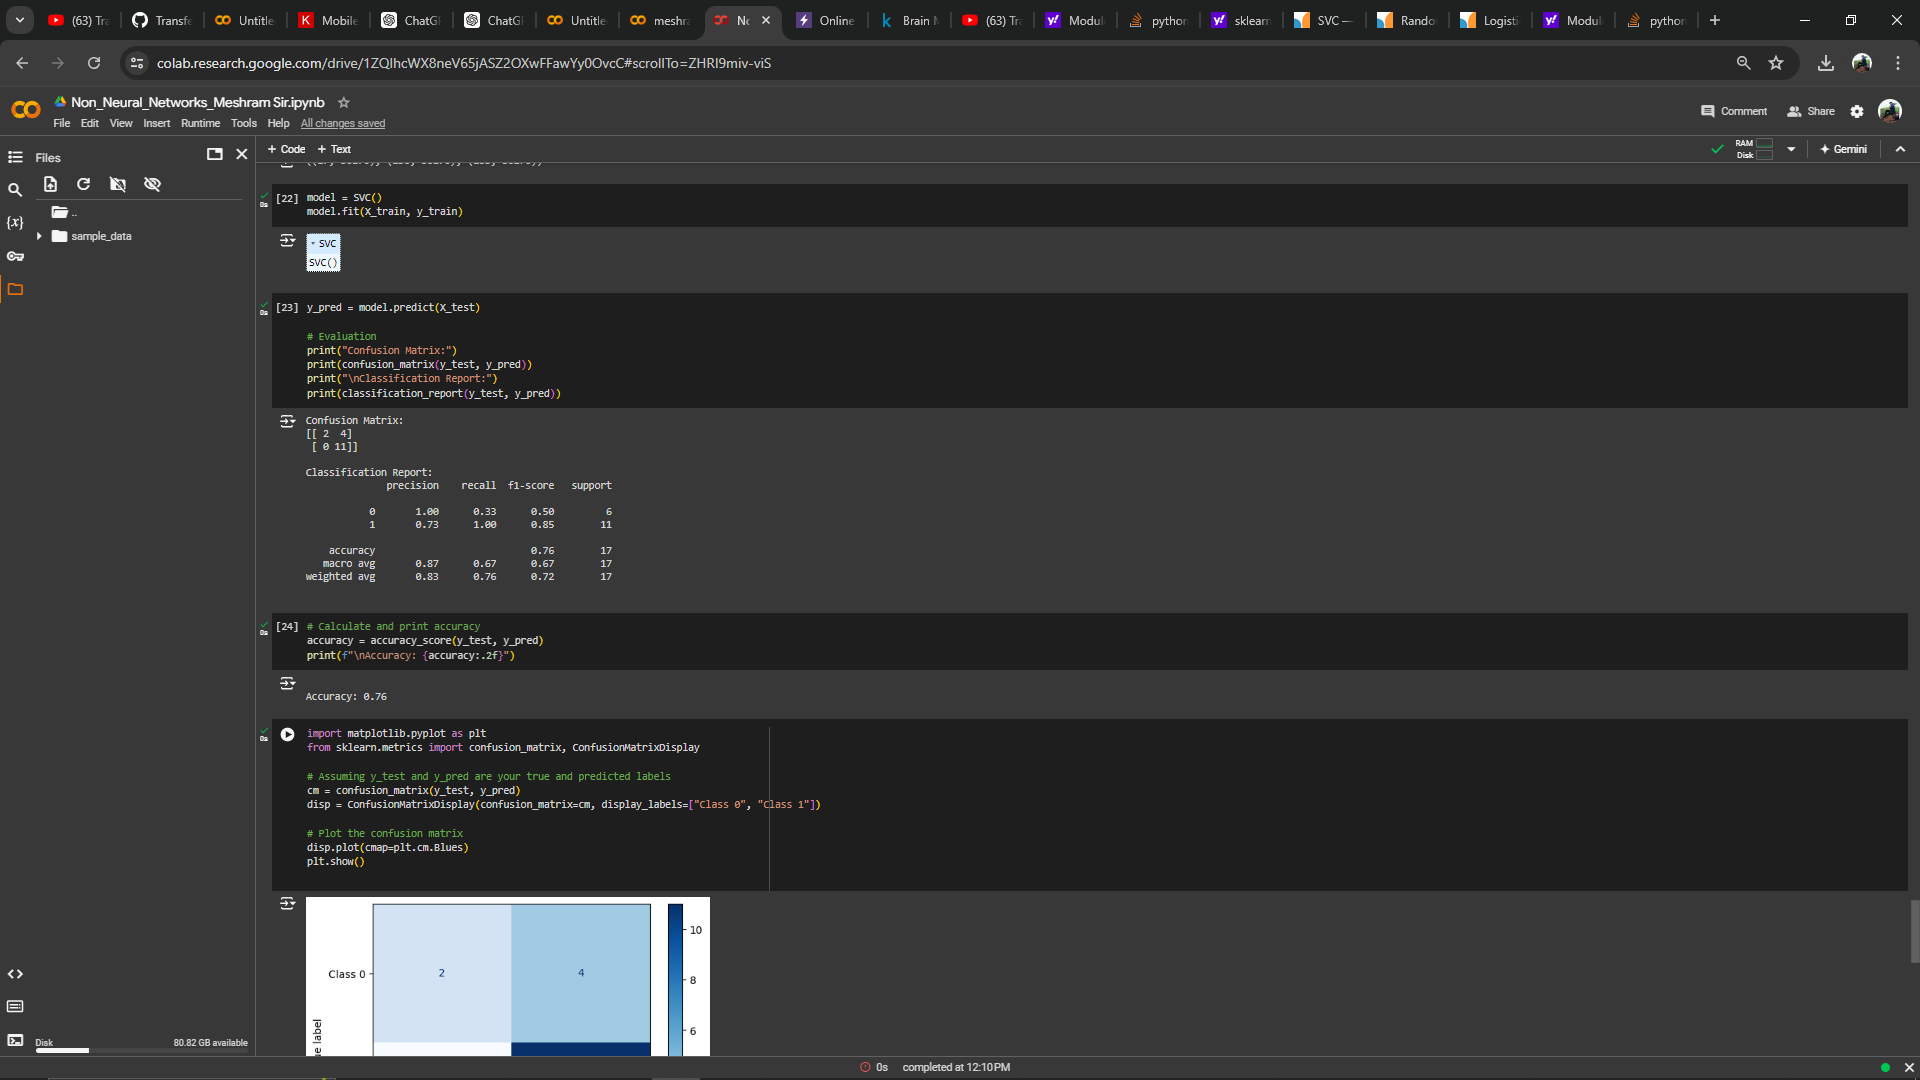

Support Vector Machine Classifier Without the denoising algorithm and without kernel
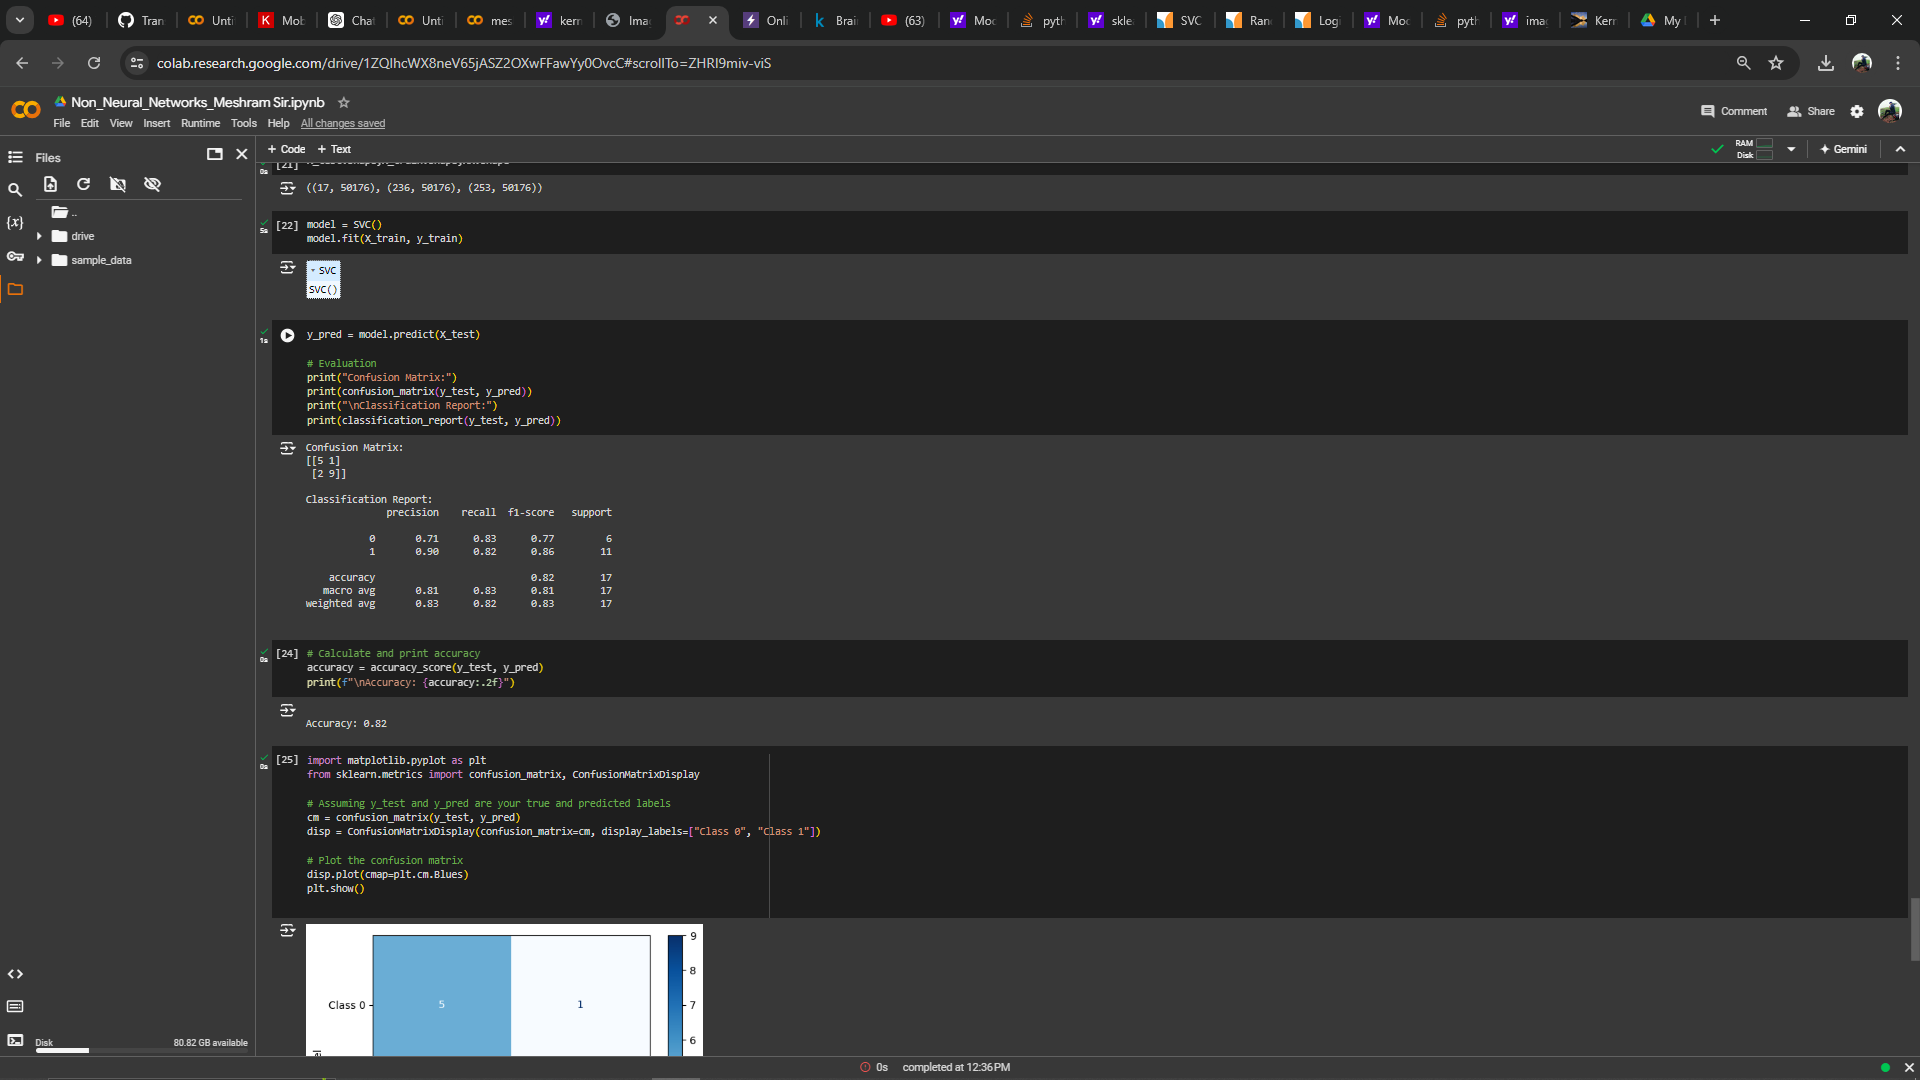